<a href="https://colab.research.google.com/github/mhalverson1/helloAI/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import time
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# create and train a pytorch digit classifier
# source: chatgpt with the prompt "create a pytorch mnist digit classifier"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set device to either CUDA or CPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Load the MNIST dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

# Set batch size and create data loaders
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Create an instance of the model and send it to the device
model = Net().to(device)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



Train Epoch: 0 [0/60000 (0%)]	Loss: 2.294281
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.914833
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.670990
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.331562
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.307011
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.172540
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.300325
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.303989
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.097420
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.189535
Test set: Average loss: 0.0027, Accuracy: 9477/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.182661
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.142167
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.169213
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.340580
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.228563
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.144887
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.114096
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.273797
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.201831
Tr

Epoch [1/100] Batch [1/469] Discriminator Loss: 1.3938 Generator Loss: 0.7009
Epoch [1/100] Batch [101/469] Discriminator Loss: 0.6136 Generator Loss: 1.1559
Epoch [1/100] Batch [201/469] Discriminator Loss: 0.4885 Generator Loss: 1.9594
Epoch [1/100] Batch [301/469] Discriminator Loss: 1.0770 Generator Loss: 0.9773
Epoch [1/100] Batch [401/469] Discriminator Loss: 1.0621 Generator Loss: 1.4561


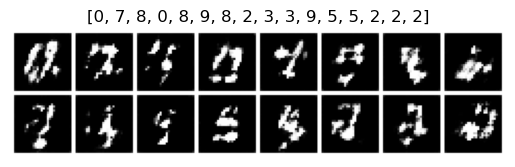

average prediction confidence over 1000 predictions: 0.42229557037353516
cumulative prediction counts: [47, 36, 130, 301, 93, 66, 24, 87, 190, 26]
epoch time: 8.529977083206177, total time: 8.529977083206177
Epoch [2/100] Batch [1/469] Discriminator Loss: 1.1836 Generator Loss: 1.3429
Epoch [2/100] Batch [101/469] Discriminator Loss: 1.1250 Generator Loss: 1.3573
Epoch [2/100] Batch [201/469] Discriminator Loss: 1.0523 Generator Loss: 1.1538
Epoch [2/100] Batch [301/469] Discriminator Loss: 1.1263 Generator Loss: 1.4022
Epoch [2/100] Batch [401/469] Discriminator Loss: 1.0019 Generator Loss: 1.0001


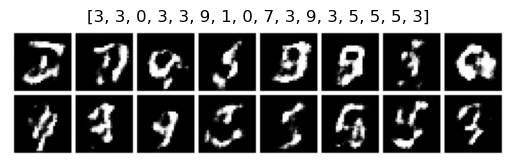

average prediction confidence over 1000 predictions: 0.4308378994464874
cumulative prediction counts: [100, 57, 229, 651, 121, 167, 41, 158, 337, 139]
epoch time: 8.352038145065308, total time: 16.882015228271484
Epoch [3/100] Batch [1/469] Discriminator Loss: 1.0470 Generator Loss: 1.1032
Epoch [3/100] Batch [101/469] Discriminator Loss: 0.9693 Generator Loss: 0.9026
Epoch [3/100] Batch [201/469] Discriminator Loss: 0.9275 Generator Loss: 1.1919
Epoch [3/100] Batch [301/469] Discriminator Loss: 0.9191 Generator Loss: 1.1472
Epoch [3/100] Batch [401/469] Discriminator Loss: 0.9818 Generator Loss: 0.9140


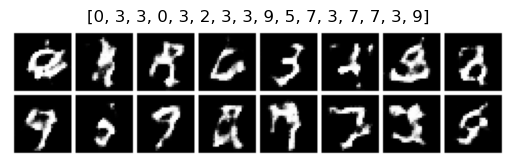

average prediction confidence over 1000 predictions: 0.4853940010070801
cumulative prediction counts: [157, 84, 301, 956, 218, 217, 88, 293, 459, 227]
epoch time: 8.397014141082764, total time: 25.279029369354248
Epoch [4/100] Batch [1/469] Discriminator Loss: 0.9726 Generator Loss: 1.6461
Epoch [4/100] Batch [101/469] Discriminator Loss: 1.1442 Generator Loss: 0.6692
Epoch [4/100] Batch [201/469] Discriminator Loss: 0.9519 Generator Loss: 1.0275
Epoch [4/100] Batch [301/469] Discriminator Loss: 0.9521 Generator Loss: 1.0707
Epoch [4/100] Batch [401/469] Discriminator Loss: 1.0045 Generator Loss: 1.1189


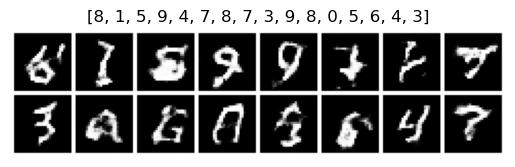

average prediction confidence over 1000 predictions: 0.505282998085022
cumulative prediction counts: [223, 146, 360, 1195, 320, 269, 139, 435, 586, 327]
epoch time: 8.656342029571533, total time: 33.93537139892578
Epoch [5/100] Batch [1/469] Discriminator Loss: 1.0280 Generator Loss: 1.2583
Epoch [5/100] Batch [101/469] Discriminator Loss: 1.0594 Generator Loss: 1.0157
Epoch [5/100] Batch [201/469] Discriminator Loss: 1.0615 Generator Loss: 0.8210
Epoch [5/100] Batch [301/469] Discriminator Loss: 1.2519 Generator Loss: 0.6095
Epoch [5/100] Batch [401/469] Discriminator Loss: 1.0985 Generator Loss: 0.7032


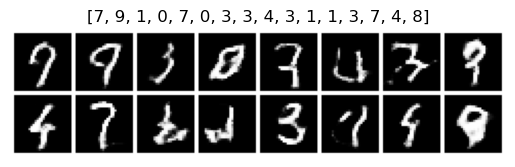

average prediction confidence over 1000 predictions: 0.5290480256080627
cumulative prediction counts: [306, 215, 410, 1381, 398, 341, 197, 574, 725, 453]
epoch time: 8.74943995475769, total time: 42.68481135368347
Epoch [6/100] Batch [1/469] Discriminator Loss: 1.1170 Generator Loss: 0.7490
Epoch [6/100] Batch [101/469] Discriminator Loss: 1.1206 Generator Loss: 1.0211
Epoch [6/100] Batch [201/469] Discriminator Loss: 1.1411 Generator Loss: 1.3250
Epoch [6/100] Batch [301/469] Discriminator Loss: 1.0985 Generator Loss: 0.9598
Epoch [6/100] Batch [401/469] Discriminator Loss: 1.1183 Generator Loss: 1.1998


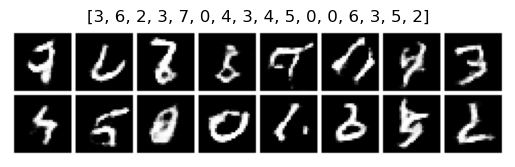

average prediction confidence over 1000 predictions: 0.5323414206504822
cumulative prediction counts: [400, 264, 479, 1568, 452, 425, 269, 691, 867, 585]
epoch time: 8.836123943328857, total time: 51.52093529701233
Epoch [7/100] Batch [1/469] Discriminator Loss: 1.0376 Generator Loss: 1.0109
Epoch [7/100] Batch [101/469] Discriminator Loss: 1.1883 Generator Loss: 1.3232
Epoch [7/100] Batch [201/469] Discriminator Loss: 1.0961 Generator Loss: 0.9254
Epoch [7/100] Batch [301/469] Discriminator Loss: 1.1793 Generator Loss: 1.5133
Epoch [7/100] Batch [401/469] Discriminator Loss: 1.0557 Generator Loss: 0.8346


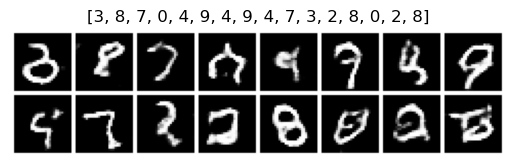

average prediction confidence over 1000 predictions: 0.529041051864624
cumulative prediction counts: [513, 325, 545, 1753, 522, 499, 322, 813, 982, 726]
epoch time: 8.684462785720825, total time: 60.205398082733154
Epoch [8/100] Batch [1/469] Discriminator Loss: 1.0967 Generator Loss: 1.2515
Epoch [8/100] Batch [101/469] Discriminator Loss: 1.1266 Generator Loss: 0.6892
Epoch [8/100] Batch [201/469] Discriminator Loss: 1.0810 Generator Loss: 0.8765
Epoch [8/100] Batch [301/469] Discriminator Loss: 1.0688 Generator Loss: 1.1804
Epoch [8/100] Batch [401/469] Discriminator Loss: 1.0990 Generator Loss: 0.6662


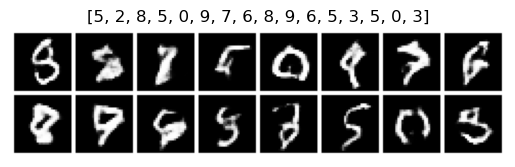

average prediction confidence over 1000 predictions: 0.5368384122848511
cumulative prediction counts: [629, 372, 631, 1896, 600, 599, 369, 950, 1096, 858]
epoch time: 8.749346017837524, total time: 68.95474410057068
Epoch [9/100] Batch [1/469] Discriminator Loss: 1.1688 Generator Loss: 0.5661
Epoch [9/100] Batch [101/469] Discriminator Loss: 1.0658 Generator Loss: 0.9548
Epoch [9/100] Batch [201/469] Discriminator Loss: 1.0447 Generator Loss: 1.1259
Epoch [9/100] Batch [301/469] Discriminator Loss: 1.0876 Generator Loss: 1.3354
Epoch [9/100] Batch [401/469] Discriminator Loss: 1.1246 Generator Loss: 1.5644


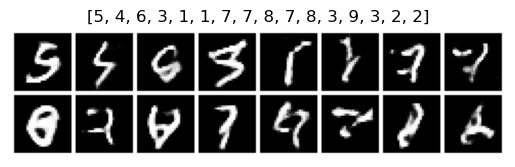

average prediction confidence over 1000 predictions: 0.5420430898666382
cumulative prediction counts: [728, 426, 706, 2096, 667, 690, 412, 1068, 1228, 979]
epoch time: 8.64510202407837, total time: 77.59984612464905
Epoch [10/100] Batch [1/469] Discriminator Loss: 1.0942 Generator Loss: 0.7931
Epoch [10/100] Batch [101/469] Discriminator Loss: 1.0498 Generator Loss: 1.3120
Epoch [10/100] Batch [201/469] Discriminator Loss: 1.1396 Generator Loss: 1.6692
Epoch [10/100] Batch [301/469] Discriminator Loss: 1.0873 Generator Loss: 1.2862
Epoch [10/100] Batch [401/469] Discriminator Loss: 1.0079 Generator Loss: 1.3524


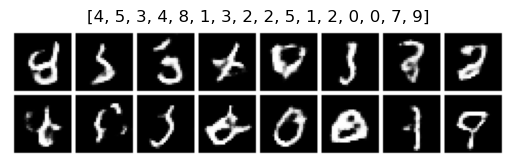

average prediction confidence over 1000 predictions: 0.544182538986206
cumulative prediction counts: [831, 488, 771, 2286, 738, 778, 461, 1182, 1350, 1115]
epoch time: 8.575777053833008, total time: 86.17562317848206
Epoch [11/100] Batch [1/469] Discriminator Loss: 1.0190 Generator Loss: 1.2879
Epoch [11/100] Batch [101/469] Discriminator Loss: 1.0787 Generator Loss: 1.4532
Epoch [11/100] Batch [201/469] Discriminator Loss: 0.9596 Generator Loss: 1.1629
Epoch [11/100] Batch [301/469] Discriminator Loss: 1.0387 Generator Loss: 1.1459
Epoch [11/100] Batch [401/469] Discriminator Loss: 1.2040 Generator Loss: 1.6857


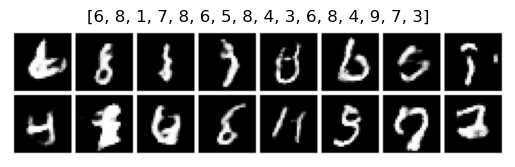

average prediction confidence over 1000 predictions: 0.5485482215881348
cumulative prediction counts: [928, 552, 852, 2470, 809, 896, 516, 1287, 1469, 1221]
epoch time: 8.871410846710205, total time: 95.04703402519226
Epoch [12/100] Batch [1/469] Discriminator Loss: 1.0041 Generator Loss: 1.0523
Epoch [12/100] Batch [101/469] Discriminator Loss: 0.9663 Generator Loss: 1.2862
Epoch [12/100] Batch [201/469] Discriminator Loss: 0.9513 Generator Loss: 0.8960
Epoch [12/100] Batch [301/469] Discriminator Loss: 0.9623 Generator Loss: 1.4497
Epoch [12/100] Batch [401/469] Discriminator Loss: 1.0359 Generator Loss: 1.3369


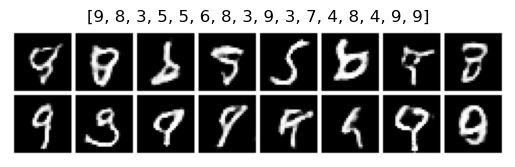

average prediction confidence over 1000 predictions: 0.5393198728561401
cumulative prediction counts: [1034, 623, 930, 2641, 876, 979, 562, 1413, 1602, 1340]
epoch time: 8.451617240905762, total time: 103.49865126609802
Epoch [13/100] Batch [1/469] Discriminator Loss: 0.9312 Generator Loss: 1.0846
Epoch [13/100] Batch [101/469] Discriminator Loss: 0.9834 Generator Loss: 0.9071
Epoch [13/100] Batch [201/469] Discriminator Loss: 0.9566 Generator Loss: 1.2825
Epoch [13/100] Batch [301/469] Discriminator Loss: 0.9810 Generator Loss: 1.4876
Epoch [13/100] Batch [401/469] Discriminator Loss: 0.9231 Generator Loss: 0.9830


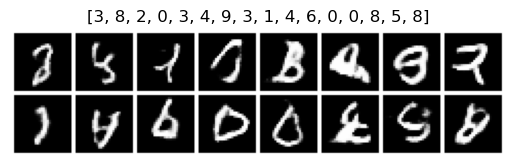

average prediction confidence over 1000 predictions: 0.5426151752471924
cumulative prediction counts: [1138, 704, 1007, 2815, 960, 1064, 614, 1525, 1732, 1441]
epoch time: 8.436865091323853, total time: 111.93551635742188
Epoch [14/100] Batch [1/469] Discriminator Loss: 1.0154 Generator Loss: 0.8398
Epoch [14/100] Batch [101/469] Discriminator Loss: 1.0101 Generator Loss: 0.8838
Epoch [14/100] Batch [201/469] Discriminator Loss: 0.9318 Generator Loss: 1.3792
Epoch [14/100] Batch [301/469] Discriminator Loss: 0.9056 Generator Loss: 0.8974
Epoch [14/100] Batch [401/469] Discriminator Loss: 0.9604 Generator Loss: 1.5874


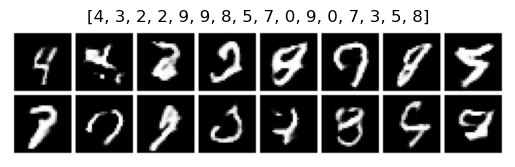

average prediction confidence over 1000 predictions: 0.5552096366882324
cumulative prediction counts: [1245, 765, 1075, 2987, 1024, 1165, 668, 1654, 1865, 1552]
epoch time: 8.339247226715088, total time: 120.27476358413696
Epoch [15/100] Batch [1/469] Discriminator Loss: 0.8949 Generator Loss: 1.3100
Epoch [15/100] Batch [101/469] Discriminator Loss: 0.8914 Generator Loss: 1.1541
Epoch [15/100] Batch [201/469] Discriminator Loss: 1.1016 Generator Loss: 0.7962
Epoch [15/100] Batch [301/469] Discriminator Loss: 1.0719 Generator Loss: 0.9216
Epoch [15/100] Batch [401/469] Discriminator Loss: 0.8803 Generator Loss: 1.6117


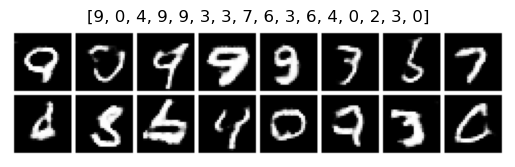

average prediction confidence over 1000 predictions: 0.5407229065895081
cumulative prediction counts: [1353, 828, 1148, 3152, 1090, 1260, 712, 1780, 1989, 1688]
epoch time: 8.687155961990356, total time: 128.96191954612732
Epoch [16/100] Batch [1/469] Discriminator Loss: 0.9374 Generator Loss: 0.9949
Epoch [16/100] Batch [101/469] Discriminator Loss: 0.8910 Generator Loss: 1.5393
Epoch [16/100] Batch [201/469] Discriminator Loss: 0.9323 Generator Loss: 1.7960
Epoch [16/100] Batch [301/469] Discriminator Loss: 0.8622 Generator Loss: 1.1593
Epoch [16/100] Batch [401/469] Discriminator Loss: 0.8974 Generator Loss: 1.0623


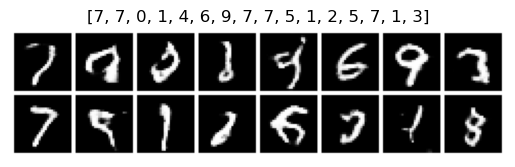

average prediction confidence over 1000 predictions: 0.5372282266616821
cumulative prediction counts: [1456, 895, 1233, 3319, 1155, 1342, 759, 1908, 2101, 1832]
epoch time: 8.500473022460938, total time: 137.46239256858826
Epoch [17/100] Batch [1/469] Discriminator Loss: 1.0564 Generator Loss: 1.0825
Epoch [17/100] Batch [101/469] Discriminator Loss: 0.9919 Generator Loss: 0.9345
Epoch [17/100] Batch [201/469] Discriminator Loss: 1.0671 Generator Loss: 0.7336
Epoch [17/100] Batch [301/469] Discriminator Loss: 0.8546 Generator Loss: 1.0260
Epoch [17/100] Batch [401/469] Discriminator Loss: 0.9783 Generator Loss: 1.7676


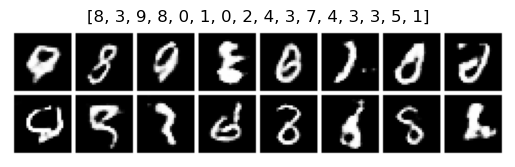

average prediction confidence over 1000 predictions: 0.5530674457550049
cumulative prediction counts: [1578, 960, 1298, 3502, 1210, 1425, 809, 2030, 2209, 1979]
epoch time: 8.654393196105957, total time: 146.1167857646942
Epoch [18/100] Batch [1/469] Discriminator Loss: 0.8007 Generator Loss: 1.0736
Epoch [18/100] Batch [101/469] Discriminator Loss: 0.8796 Generator Loss: 1.0416
Epoch [18/100] Batch [201/469] Discriminator Loss: 0.8610 Generator Loss: 1.6640
Epoch [18/100] Batch [301/469] Discriminator Loss: 0.9571 Generator Loss: 1.6941
Epoch [18/100] Batch [401/469] Discriminator Loss: 0.8892 Generator Loss: 1.4332


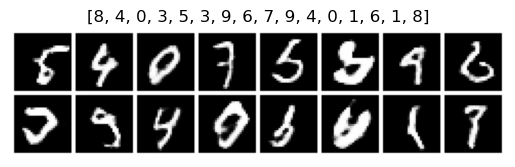

average prediction confidence over 1000 predictions: 0.5685166120529175
cumulative prediction counts: [1683, 1022, 1359, 3692, 1284, 1510, 853, 2156, 2331, 2110]
epoch time: 8.521705150604248, total time: 154.63849091529846
Epoch [19/100] Batch [1/469] Discriminator Loss: 0.9151 Generator Loss: 0.9646
Epoch [19/100] Batch [101/469] Discriminator Loss: 0.9786 Generator Loss: 1.1180
Epoch [19/100] Batch [201/469] Discriminator Loss: 0.8459 Generator Loss: 1.3081
Epoch [19/100] Batch [301/469] Discriminator Loss: 0.9218 Generator Loss: 1.3461
Epoch [19/100] Batch [401/469] Discriminator Loss: 0.8463 Generator Loss: 1.3938


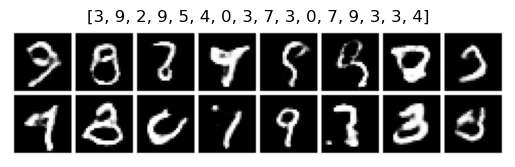

average prediction confidence over 1000 predictions: 0.5562559366226196
cumulative prediction counts: [1789, 1083, 1429, 3887, 1335, 1590, 895, 2295, 2455, 2242]
epoch time: 8.719969987869263, total time: 163.35846090316772
Epoch [20/100] Batch [1/469] Discriminator Loss: 0.8678 Generator Loss: 0.9694
Epoch [20/100] Batch [101/469] Discriminator Loss: 0.7637 Generator Loss: 1.2668
Epoch [20/100] Batch [201/469] Discriminator Loss: 0.8950 Generator Loss: 1.3836
Epoch [20/100] Batch [301/469] Discriminator Loss: 0.9993 Generator Loss: 0.9232
Epoch [20/100] Batch [401/469] Discriminator Loss: 0.8861 Generator Loss: 1.0675


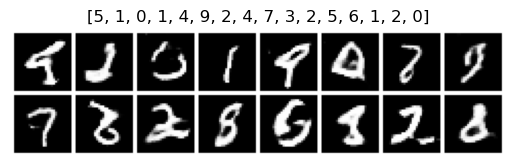

average prediction confidence over 1000 predictions: 0.5609484910964966
cumulative prediction counts: [1894, 1137, 1493, 4062, 1386, 1695, 932, 2441, 2597, 2363]
epoch time: 8.4492769241333, total time: 171.80773782730103
Epoch [21/100] Batch [1/469] Discriminator Loss: 0.9436 Generator Loss: 1.6538
Epoch [21/100] Batch [101/469] Discriminator Loss: 0.9721 Generator Loss: 0.9392
Epoch [21/100] Batch [201/469] Discriminator Loss: 0.8812 Generator Loss: 1.6140
Epoch [21/100] Batch [301/469] Discriminator Loss: 0.8972 Generator Loss: 1.4824
Epoch [21/100] Batch [401/469] Discriminator Loss: 0.8233 Generator Loss: 1.4893


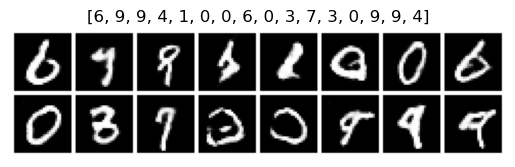

average prediction confidence over 1000 predictions: 0.5654866695404053
cumulative prediction counts: [2022, 1188, 1552, 4247, 1447, 1789, 975, 2557, 2724, 2499]
epoch time: 8.412457942962646, total time: 180.22019577026367
Epoch [22/100] Batch [1/469] Discriminator Loss: 0.9283 Generator Loss: 1.3371
Epoch [22/100] Batch [101/469] Discriminator Loss: 0.9108 Generator Loss: 1.5968
Epoch [22/100] Batch [201/469] Discriminator Loss: 0.8471 Generator Loss: 1.5170
Epoch [22/100] Batch [301/469] Discriminator Loss: 0.7649 Generator Loss: 1.5272
Epoch [22/100] Batch [401/469] Discriminator Loss: 0.8166 Generator Loss: 1.3378


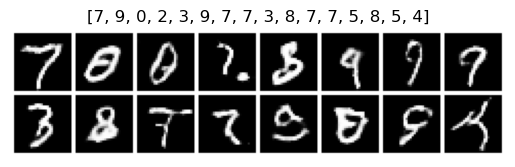

average prediction confidence over 1000 predictions: 0.567416787147522
cumulative prediction counts: [2127, 1245, 1619, 4440, 1512, 1861, 1014, 2700, 2833, 2649]
epoch time: 8.387126922607422, total time: 188.6073226928711
Epoch [23/100] Batch [1/469] Discriminator Loss: 0.8347 Generator Loss: 1.1355
Epoch [23/100] Batch [101/469] Discriminator Loss: 0.8877 Generator Loss: 1.6115
Epoch [23/100] Batch [201/469] Discriminator Loss: 0.9245 Generator Loss: 1.6800
Epoch [23/100] Batch [301/469] Discriminator Loss: 0.9564 Generator Loss: 1.5972
Epoch [23/100] Batch [401/469] Discriminator Loss: 0.7817 Generator Loss: 1.4848


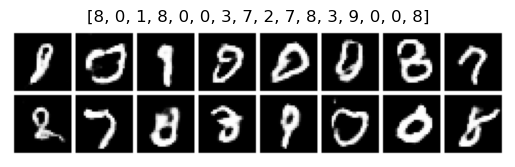

average prediction confidence over 1000 predictions: 0.5647037029266357
cumulative prediction counts: [2234, 1294, 1688, 4607, 1564, 1946, 1056, 2848, 2967, 2796]
epoch time: 8.325214862823486, total time: 196.93253755569458
Epoch [24/100] Batch [1/469] Discriminator Loss: 0.9669 Generator Loss: 1.7178
Epoch [24/100] Batch [101/469] Discriminator Loss: 0.9875 Generator Loss: 2.2194
Epoch [24/100] Batch [201/469] Discriminator Loss: 0.7944 Generator Loss: 1.2473
Epoch [24/100] Batch [301/469] Discriminator Loss: 0.7941 Generator Loss: 1.0310
Epoch [24/100] Batch [401/469] Discriminator Loss: 0.7542 Generator Loss: 1.8634


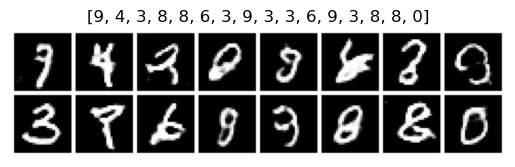

average prediction confidence over 1000 predictions: 0.5645783543586731
cumulative prediction counts: [2344, 1336, 1740, 4778, 1628, 2021, 1099, 2988, 3118, 2948]
epoch time: 8.293072938919067, total time: 205.22561049461365
Epoch [25/100] Batch [1/469] Discriminator Loss: 0.8476 Generator Loss: 1.6110
Epoch [25/100] Batch [101/469] Discriminator Loss: 0.8831 Generator Loss: 1.0065
Epoch [25/100] Batch [201/469] Discriminator Loss: 0.8789 Generator Loss: 1.5495
Epoch [25/100] Batch [301/469] Discriminator Loss: 0.9060 Generator Loss: 1.4808
Epoch [25/100] Batch [401/469] Discriminator Loss: 0.8440 Generator Loss: 1.1731


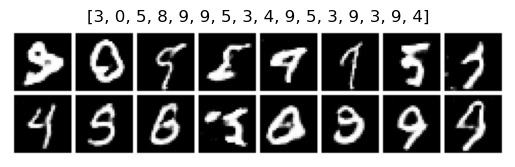

average prediction confidence over 1000 predictions: 0.5784209370613098
cumulative prediction counts: [2454, 1392, 1791, 4967, 1696, 2094, 1127, 3159, 3256, 3064]
epoch time: 8.413691997528076, total time: 213.63930249214172
Epoch [26/100] Batch [1/469] Discriminator Loss: 0.8574 Generator Loss: 1.7585
Epoch [26/100] Batch [101/469] Discriminator Loss: 0.8841 Generator Loss: 2.0114
Epoch [26/100] Batch [201/469] Discriminator Loss: 0.8955 Generator Loss: 1.0345
Epoch [26/100] Batch [301/469] Discriminator Loss: 0.8588 Generator Loss: 1.5680
Epoch [26/100] Batch [401/469] Discriminator Loss: 0.8351 Generator Loss: 1.0305


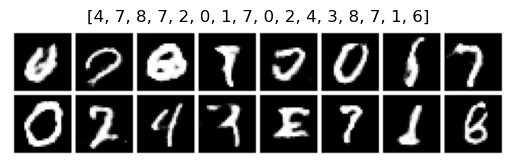

average prediction confidence over 1000 predictions: 0.5591965317726135
cumulative prediction counts: [2593, 1452, 1863, 5109, 1758, 2167, 1164, 3286, 3403, 3205]
epoch time: 8.273237943649292, total time: 221.91254043579102
Epoch [27/100] Batch [1/469] Discriminator Loss: 0.7655 Generator Loss: 1.4797
Epoch [27/100] Batch [101/469] Discriminator Loss: 0.8532 Generator Loss: 1.1141
Epoch [27/100] Batch [201/469] Discriminator Loss: 0.7999 Generator Loss: 1.4200
Epoch [27/100] Batch [301/469] Discriminator Loss: 0.7900 Generator Loss: 2.0051
Epoch [27/100] Batch [401/469] Discriminator Loss: 0.9254 Generator Loss: 1.7965


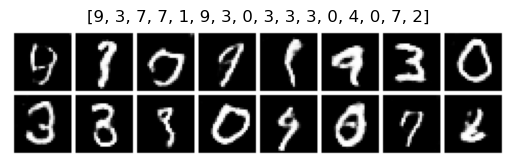

average prediction confidence over 1000 predictions: 0.5790903568267822
cumulative prediction counts: [2728, 1504, 1930, 5263, 1816, 2243, 1200, 3449, 3516, 3351]
epoch time: 8.362653255462646, total time: 230.27519369125366
Epoch [28/100] Batch [1/469] Discriminator Loss: 0.9273 Generator Loss: 1.0252
Epoch [28/100] Batch [101/469] Discriminator Loss: 0.8692 Generator Loss: 1.7175
Epoch [28/100] Batch [201/469] Discriminator Loss: 0.8891 Generator Loss: 1.8189
Epoch [28/100] Batch [301/469] Discriminator Loss: 0.8057 Generator Loss: 1.1580
Epoch [28/100] Batch [401/469] Discriminator Loss: 0.8438 Generator Loss: 2.2513


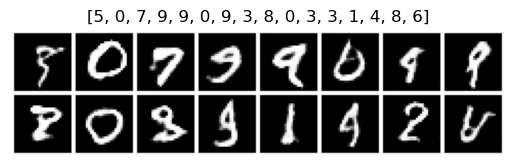

average prediction confidence over 1000 predictions: 0.564100980758667
cumulative prediction counts: [2834, 1563, 2000, 5419, 1880, 2319, 1233, 3591, 3639, 3522]
epoch time: 8.34151005744934, total time: 238.616703748703
Epoch [29/100] Batch [1/469] Discriminator Loss: 0.8875 Generator Loss: 2.2051
Epoch [29/100] Batch [101/469] Discriminator Loss: 0.8107 Generator Loss: 1.1339
Epoch [29/100] Batch [201/469] Discriminator Loss: 0.8007 Generator Loss: 1.0411
Epoch [29/100] Batch [301/469] Discriminator Loss: 0.7439 Generator Loss: 1.3204
Epoch [29/100] Batch [401/469] Discriminator Loss: 0.7993 Generator Loss: 1.0953


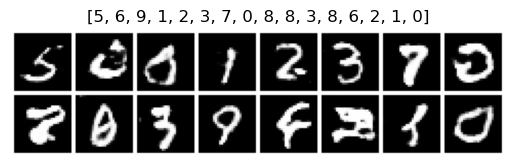

average prediction confidence over 1000 predictions: 0.5668655633926392
cumulative prediction counts: [2947, 1618, 2069, 5593, 1951, 2383, 1269, 3740, 3767, 3663]
epoch time: 8.351500988006592, total time: 246.9682047367096
Epoch [30/100] Batch [1/469] Discriminator Loss: 0.8846 Generator Loss: 1.2574
Epoch [30/100] Batch [101/469] Discriminator Loss: 0.9111 Generator Loss: 1.9667
Epoch [30/100] Batch [201/469] Discriminator Loss: 1.1281 Generator Loss: 2.4746
Epoch [30/100] Batch [301/469] Discriminator Loss: 0.7580 Generator Loss: 1.8513
Epoch [30/100] Batch [401/469] Discriminator Loss: 0.7401 Generator Loss: 1.9980


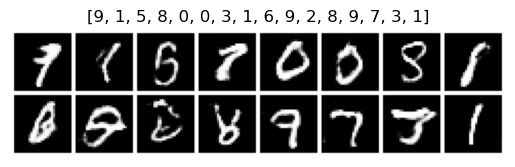

average prediction confidence over 1000 predictions: 0.5827270746231079
cumulative prediction counts: [3070, 1664, 2141, 5757, 2019, 2452, 1303, 3893, 3915, 3786]
epoch time: 8.261150121688843, total time: 255.22935485839844
Epoch [31/100] Batch [1/469] Discriminator Loss: 0.8163 Generator Loss: 1.3133
Epoch [31/100] Batch [101/469] Discriminator Loss: 0.8713 Generator Loss: 1.8229
Epoch [31/100] Batch [201/469] Discriminator Loss: 0.7452 Generator Loss: 1.6048
Epoch [31/100] Batch [301/469] Discriminator Loss: 0.7968 Generator Loss: 1.7424
Epoch [31/100] Batch [401/469] Discriminator Loss: 0.7852 Generator Loss: 1.6730


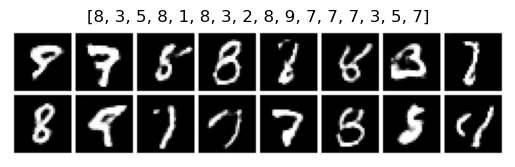

average prediction confidence over 1000 predictions: 0.5793378353118896
cumulative prediction counts: [3191, 1723, 2200, 5913, 2082, 2529, 1338, 4047, 4036, 3941]
epoch time: 8.351752042770386, total time: 263.5811069011688
Epoch [32/100] Batch [1/469] Discriminator Loss: 0.8285 Generator Loss: 1.4999
Epoch [32/100] Batch [101/469] Discriminator Loss: 0.8159 Generator Loss: 0.9328
Epoch [32/100] Batch [201/469] Discriminator Loss: 0.8051 Generator Loss: 2.0308
Epoch [32/100] Batch [301/469] Discriminator Loss: 0.7223 Generator Loss: 1.9424
Epoch [32/100] Batch [401/469] Discriminator Loss: 0.8305 Generator Loss: 1.6936


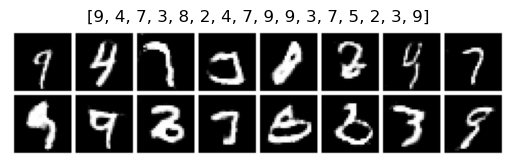

average prediction confidence over 1000 predictions: 0.5960991978645325
cumulative prediction counts: [3335, 1775, 2278, 6077, 2156, 2594, 1361, 4193, 4154, 4077]
epoch time: 8.394122838973999, total time: 271.9752297401428
Epoch [33/100] Batch [1/469] Discriminator Loss: 0.7194 Generator Loss: 1.1763
Epoch [33/100] Batch [101/469] Discriminator Loss: 0.7782 Generator Loss: 1.5404
Epoch [33/100] Batch [201/469] Discriminator Loss: 0.7492 Generator Loss: 1.4160
Epoch [33/100] Batch [301/469] Discriminator Loss: 0.8956 Generator Loss: 0.8684
Epoch [33/100] Batch [401/469] Discriminator Loss: 0.8793 Generator Loss: 1.5721


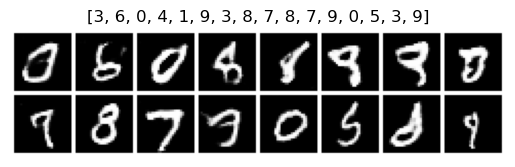

average prediction confidence over 1000 predictions: 0.5850384831428528
cumulative prediction counts: [3493, 1838, 2338, 6238, 2218, 2657, 1392, 4332, 4284, 4210]
epoch time: 8.414700031280518, total time: 280.38992977142334
Epoch [34/100] Batch [1/469] Discriminator Loss: 0.7731 Generator Loss: 1.6479
Epoch [34/100] Batch [101/469] Discriminator Loss: 0.8864 Generator Loss: 1.1763
Epoch [34/100] Batch [201/469] Discriminator Loss: 0.8008 Generator Loss: 1.4228
Epoch [34/100] Batch [301/469] Discriminator Loss: 0.8053 Generator Loss: 1.3268
Epoch [34/100] Batch [401/469] Discriminator Loss: 0.9390 Generator Loss: 1.1050


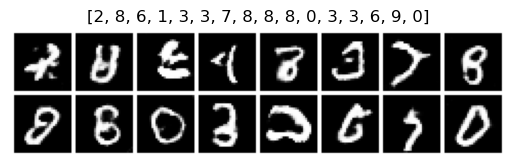

average prediction confidence over 1000 predictions: 0.5808142423629761
cumulative prediction counts: [3625, 1891, 2405, 6395, 2286, 2706, 1430, 4506, 4413, 4343]
epoch time: 8.325424909591675, total time: 288.715354681015
Epoch [35/100] Batch [1/469] Discriminator Loss: 0.9597 Generator Loss: 1.9404
Epoch [35/100] Batch [101/469] Discriminator Loss: 0.9580 Generator Loss: 2.2375
Epoch [35/100] Batch [201/469] Discriminator Loss: 0.8442 Generator Loss: 1.1875
Epoch [35/100] Batch [301/469] Discriminator Loss: 0.7661 Generator Loss: 1.6098
Epoch [35/100] Batch [401/469] Discriminator Loss: 0.7894 Generator Loss: 1.5744


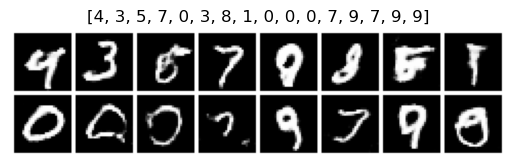

average prediction confidence over 1000 predictions: 0.58188796043396
cumulative prediction counts: [3756, 1953, 2460, 6564, 2350, 2770, 1452, 4665, 4551, 4479]
epoch time: 8.404048919677734, total time: 297.11940360069275
Epoch [36/100] Batch [1/469] Discriminator Loss: 0.7873 Generator Loss: 1.9362
Epoch [36/100] Batch [101/469] Discriminator Loss: 0.7081 Generator Loss: 1.6786
Epoch [36/100] Batch [201/469] Discriminator Loss: 0.9416 Generator Loss: 1.9464
Epoch [36/100] Batch [301/469] Discriminator Loss: 0.7565 Generator Loss: 1.6092
Epoch [36/100] Batch [401/469] Discriminator Loss: 0.8280 Generator Loss: 1.0006


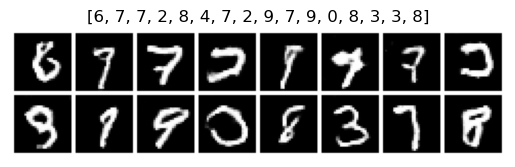

average prediction confidence over 1000 predictions: 0.5875444412231445
cumulative prediction counts: [3907, 2004, 2518, 6728, 2406, 2839, 1476, 4819, 4683, 4620]
epoch time: 8.328248739242554, total time: 305.4476523399353
Epoch [37/100] Batch [1/469] Discriminator Loss: 0.7510 Generator Loss: 1.4938
Epoch [37/100] Batch [101/469] Discriminator Loss: 0.7986 Generator Loss: 1.4223
Epoch [37/100] Batch [201/469] Discriminator Loss: 0.8255 Generator Loss: 1.4120
Epoch [37/100] Batch [301/469] Discriminator Loss: 0.8647 Generator Loss: 1.6098
Epoch [37/100] Batch [401/469] Discriminator Loss: 0.7828 Generator Loss: 1.4284


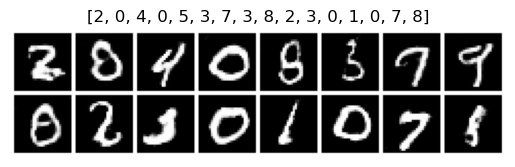

average prediction confidence over 1000 predictions: 0.5934079885482788
cumulative prediction counts: [4042, 2071, 2584, 6881, 2470, 2896, 1496, 4996, 4803, 4761]
epoch time: 8.291555881500244, total time: 313.73920822143555
Epoch [38/100] Batch [1/469] Discriminator Loss: 0.7403 Generator Loss: 1.9968
Epoch [38/100] Batch [101/469] Discriminator Loss: 0.8875 Generator Loss: 1.0755
Epoch [38/100] Batch [201/469] Discriminator Loss: 0.8752 Generator Loss: 1.4358
Epoch [38/100] Batch [301/469] Discriminator Loss: 0.8414 Generator Loss: 1.3096
Epoch [38/100] Batch [401/469] Discriminator Loss: 0.8209 Generator Loss: 1.7573


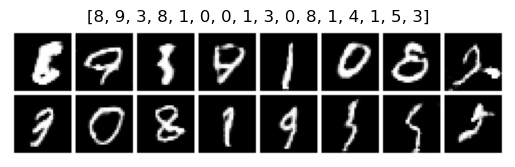

average prediction confidence over 1000 predictions: 0.575545072555542
cumulative prediction counts: [4161, 2129, 2665, 7062, 2521, 2969, 1530, 5145, 4910, 4908]
epoch time: 8.299004077911377, total time: 322.0382122993469
Epoch [39/100] Batch [1/469] Discriminator Loss: 0.7392 Generator Loss: 1.5361
Epoch [39/100] Batch [101/469] Discriminator Loss: 0.9349 Generator Loss: 2.1647
Epoch [39/100] Batch [201/469] Discriminator Loss: 0.9433 Generator Loss: 1.1239
Epoch [39/100] Batch [301/469] Discriminator Loss: 0.8189 Generator Loss: 1.9085
Epoch [39/100] Batch [401/469] Discriminator Loss: 0.8321 Generator Loss: 1.2420


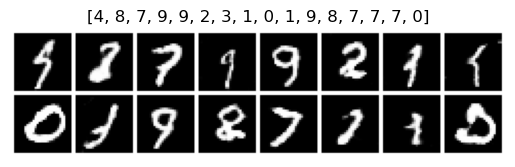

average prediction confidence over 1000 predictions: 0.596948504447937
cumulative prediction counts: [4303, 2187, 2725, 7229, 2585, 3030, 1559, 5288, 5047, 5047]
epoch time: 8.442135095596313, total time: 330.48034739494324
Epoch [40/100] Batch [1/469] Discriminator Loss: 0.8800 Generator Loss: 1.1620
Epoch [40/100] Batch [101/469] Discriminator Loss: 0.8106 Generator Loss: 1.6132
Epoch [40/100] Batch [201/469] Discriminator Loss: 0.8207 Generator Loss: 1.6925
Epoch [40/100] Batch [301/469] Discriminator Loss: 0.8841 Generator Loss: 2.1130
Epoch [40/100] Batch [401/469] Discriminator Loss: 0.7234 Generator Loss: 1.5513


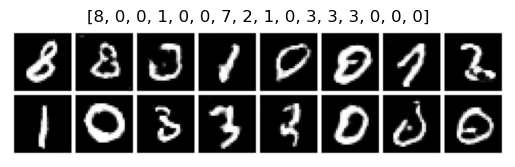

average prediction confidence over 1000 predictions: 0.5957728624343872
cumulative prediction counts: [4431, 2240, 2794, 7388, 2640, 3092, 1583, 5455, 5173, 5204]
epoch time: 8.326833963394165, total time: 338.8071813583374
Epoch [41/100] Batch [1/469] Discriminator Loss: 0.7978 Generator Loss: 1.4902
Epoch [41/100] Batch [101/469] Discriminator Loss: 0.7687 Generator Loss: 1.7393
Epoch [41/100] Batch [201/469] Discriminator Loss: 0.8748 Generator Loss: 1.1856
Epoch [41/100] Batch [301/469] Discriminator Loss: 0.8910 Generator Loss: 1.2126
Epoch [41/100] Batch [401/469] Discriminator Loss: 0.8520 Generator Loss: 2.1961


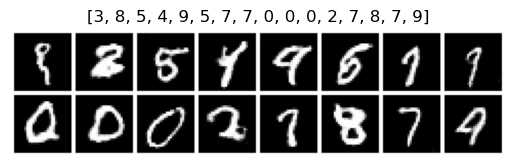

average prediction confidence over 1000 predictions: 0.5900672674179077
cumulative prediction counts: [4567, 2290, 2864, 7547, 2710, 3164, 1609, 5608, 5295, 5346]
epoch time: 8.291124105453491, total time: 347.0983054637909
Epoch [42/100] Batch [1/469] Discriminator Loss: 0.9236 Generator Loss: 0.9492
Epoch [42/100] Batch [101/469] Discriminator Loss: 0.8515 Generator Loss: 1.3491
Epoch [42/100] Batch [201/469] Discriminator Loss: 0.7233 Generator Loss: 1.2189
Epoch [42/100] Batch [301/469] Discriminator Loss: 0.7807 Generator Loss: 1.7924
Epoch [42/100] Batch [401/469] Discriminator Loss: 0.7155 Generator Loss: 1.1859


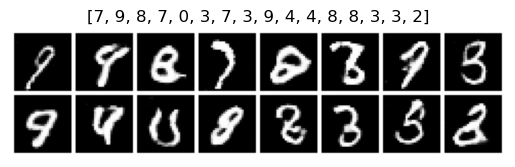

average prediction confidence over 1000 predictions: 0.5852187275886536
cumulative prediction counts: [4698, 2350, 2923, 7704, 2793, 3230, 1635, 5775, 5416, 5476]
epoch time: 8.216897010803223, total time: 355.3152024745941
Epoch [43/100] Batch [1/469] Discriminator Loss: 0.7777 Generator Loss: 1.4756
Epoch [43/100] Batch [101/469] Discriminator Loss: 0.6955 Generator Loss: 2.2358
Epoch [43/100] Batch [201/469] Discriminator Loss: 0.8428 Generator Loss: 1.3043
Epoch [43/100] Batch [301/469] Discriminator Loss: 0.7251 Generator Loss: 1.5908
Epoch [43/100] Batch [401/469] Discriminator Loss: 0.9873 Generator Loss: 0.9096


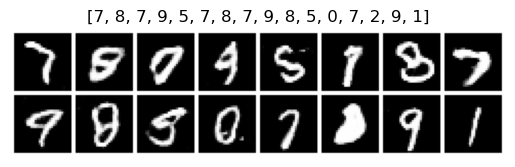

average prediction confidence over 1000 predictions: 0.5842574834823608
cumulative prediction counts: [4854, 2404, 2993, 7844, 2850, 3312, 1650, 5914, 5556, 5623]
epoch time: 8.435685157775879, total time: 363.75088763237
Epoch [44/100] Batch [1/469] Discriminator Loss: 0.8386 Generator Loss: 1.5842
Epoch [44/100] Batch [101/469] Discriminator Loss: 0.8692 Generator Loss: 2.2397
Epoch [44/100] Batch [201/469] Discriminator Loss: 0.6995 Generator Loss: 1.9388
Epoch [44/100] Batch [301/469] Discriminator Loss: 0.8345 Generator Loss: 1.2652
Epoch [44/100] Batch [401/469] Discriminator Loss: 0.8667 Generator Loss: 2.2962


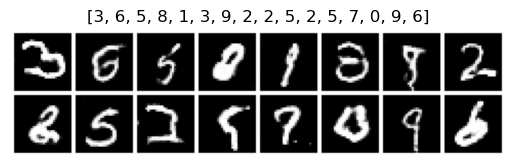

average prediction confidence over 1000 predictions: 0.5965367555618286
cumulative prediction counts: [5001, 2460, 3050, 8002, 2905, 3374, 1682, 6071, 5690, 5765]
epoch time: 8.585622787475586, total time: 372.3365104198456
Epoch [45/100] Batch [1/469] Discriminator Loss: 0.8477 Generator Loss: 1.9269
Epoch [45/100] Batch [101/469] Discriminator Loss: 0.6533 Generator Loss: 1.8459
Epoch [45/100] Batch [201/469] Discriminator Loss: 0.8713 Generator Loss: 1.1244
Epoch [45/100] Batch [301/469] Discriminator Loss: 0.7144 Generator Loss: 1.5293
Epoch [45/100] Batch [401/469] Discriminator Loss: 0.6646 Generator Loss: 1.6054


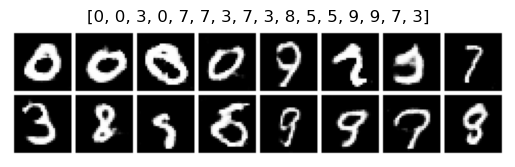

average prediction confidence over 1000 predictions: 0.6038100719451904
cumulative prediction counts: [5158, 2512, 3112, 8147, 2975, 3433, 1703, 6243, 5816, 5901]
epoch time: 8.44308876991272, total time: 380.7795991897583
Epoch [46/100] Batch [1/469] Discriminator Loss: 0.7593 Generator Loss: 1.9742
Epoch [46/100] Batch [101/469] Discriminator Loss: 0.6548 Generator Loss: 1.6118
Epoch [46/100] Batch [201/469] Discriminator Loss: 0.8890 Generator Loss: 1.2430
Epoch [46/100] Batch [301/469] Discriminator Loss: 0.8883 Generator Loss: 0.9078
Epoch [46/100] Batch [401/469] Discriminator Loss: 0.7471 Generator Loss: 1.7696


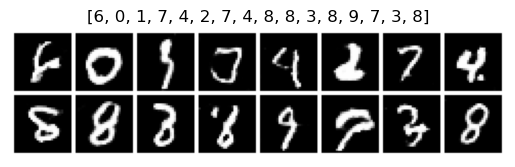

average prediction confidence over 1000 predictions: 0.59869784116745
cumulative prediction counts: [5281, 2568, 3178, 8307, 3046, 3497, 1723, 6404, 5952, 6044]
epoch time: 8.294565200805664, total time: 389.07416439056396
Epoch [47/100] Batch [1/469] Discriminator Loss: 0.7686 Generator Loss: 1.4418
Epoch [47/100] Batch [101/469] Discriminator Loss: 0.7467 Generator Loss: 1.2815
Epoch [47/100] Batch [201/469] Discriminator Loss: 0.6302 Generator Loss: 1.2502
Epoch [47/100] Batch [301/469] Discriminator Loss: 0.7810 Generator Loss: 2.1892
Epoch [47/100] Batch [401/469] Discriminator Loss: 0.6989 Generator Loss: 1.4921


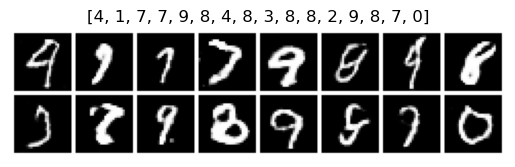

average prediction confidence over 1000 predictions: 0.5970405340194702
cumulative prediction counts: [5417, 2620, 3245, 8466, 3115, 3541, 1750, 6564, 6079, 6203]
epoch time: 8.328479051589966, total time: 397.40264344215393
Epoch [48/100] Batch [1/469] Discriminator Loss: 0.7236 Generator Loss: 2.2588
Epoch [48/100] Batch [101/469] Discriminator Loss: 0.8312 Generator Loss: 2.6981
Epoch [48/100] Batch [201/469] Discriminator Loss: 0.6764 Generator Loss: 1.3508
Epoch [48/100] Batch [301/469] Discriminator Loss: 0.7406 Generator Loss: 1.3578
Epoch [48/100] Batch [401/469] Discriminator Loss: 1.0038 Generator Loss: 2.3242


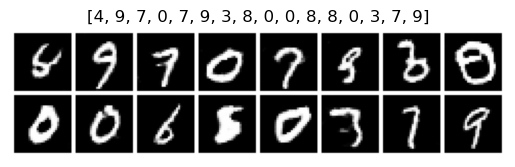

average prediction confidence over 1000 predictions: 0.6049388647079468
cumulative prediction counts: [5543, 2676, 3302, 8633, 3174, 3596, 1784, 6752, 6177, 6363]
epoch time: 8.806001901626587, total time: 406.2086453437805
Epoch [49/100] Batch [1/469] Discriminator Loss: 0.7516 Generator Loss: 1.5755
Epoch [49/100] Batch [101/469] Discriminator Loss: 0.9113 Generator Loss: 1.4478
Epoch [49/100] Batch [201/469] Discriminator Loss: 0.7442 Generator Loss: 1.7326
Epoch [49/100] Batch [301/469] Discriminator Loss: 0.9299 Generator Loss: 1.0358
Epoch [49/100] Batch [401/469] Discriminator Loss: 0.7484 Generator Loss: 1.3203


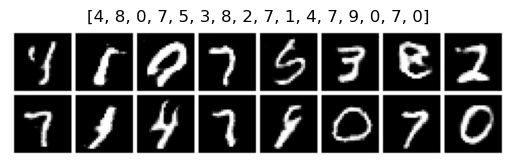

average prediction confidence over 1000 predictions: 0.6038520932197571
cumulative prediction counts: [5679, 2733, 3369, 8766, 3254, 3660, 1822, 6920, 6280, 6517]
epoch time: 8.591611862182617, total time: 414.80025720596313
Epoch [50/100] Batch [1/469] Discriminator Loss: 0.9056 Generator Loss: 1.4960
Epoch [50/100] Batch [101/469] Discriminator Loss: 0.7082 Generator Loss: 1.7497
Epoch [50/100] Batch [201/469] Discriminator Loss: 0.7055 Generator Loss: 1.6361
Epoch [50/100] Batch [301/469] Discriminator Loss: 0.7893 Generator Loss: 2.5241
Epoch [50/100] Batch [401/469] Discriminator Loss: 0.9496 Generator Loss: 2.1857


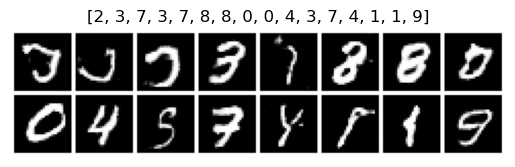

average prediction confidence over 1000 predictions: 0.6092729568481445
cumulative prediction counts: [5818, 2785, 3436, 8912, 3343, 3715, 1846, 7084, 6378, 6683]
epoch time: 8.403215169906616, total time: 423.20347237586975
Epoch [51/100] Batch [1/469] Discriminator Loss: 0.7058 Generator Loss: 1.3156
Epoch [51/100] Batch [101/469] Discriminator Loss: 0.6923 Generator Loss: 2.0144
Epoch [51/100] Batch [201/469] Discriminator Loss: 0.6172 Generator Loss: 1.5554
Epoch [51/100] Batch [301/469] Discriminator Loss: 0.7763 Generator Loss: 1.6144
Epoch [51/100] Batch [401/469] Discriminator Loss: 0.8318 Generator Loss: 2.5036


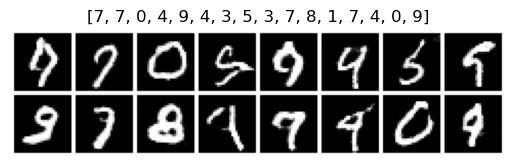

average prediction confidence over 1000 predictions: 0.5984706878662109
cumulative prediction counts: [5942, 2827, 3506, 9073, 3405, 3773, 1875, 7248, 6505, 6846]
epoch time: 8.54365062713623, total time: 431.747123003006
Epoch [52/100] Batch [1/469] Discriminator Loss: 0.7033 Generator Loss: 2.2089
Epoch [52/100] Batch [101/469] Discriminator Loss: 0.8176 Generator Loss: 1.1326
Epoch [52/100] Batch [201/469] Discriminator Loss: 0.8753 Generator Loss: 2.7354
Epoch [52/100] Batch [301/469] Discriminator Loss: 0.6928 Generator Loss: 2.2181
Epoch [52/100] Batch [401/469] Discriminator Loss: 0.7400 Generator Loss: 2.5180


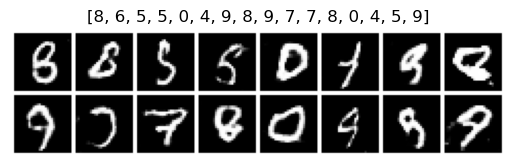

average prediction confidence over 1000 predictions: 0.6035211682319641
cumulative prediction counts: [6088, 2873, 3570, 9215, 3477, 3830, 1901, 7428, 6614, 7004]
epoch time: 8.294790029525757, total time: 440.04191303253174
Epoch [53/100] Batch [1/469] Discriminator Loss: 0.7595 Generator Loss: 1.0423
Epoch [53/100] Batch [101/469] Discriminator Loss: 0.8240 Generator Loss: 1.6357
Epoch [53/100] Batch [201/469] Discriminator Loss: 0.7116 Generator Loss: 1.8568
Epoch [53/100] Batch [301/469] Discriminator Loss: 0.7393 Generator Loss: 1.4693
Epoch [53/100] Batch [401/469] Discriminator Loss: 0.6927 Generator Loss: 1.5929


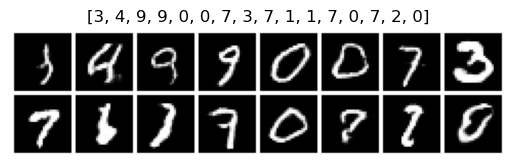

average prediction confidence over 1000 predictions: 0.5998017191886902
cumulative prediction counts: [6198, 2926, 3623, 9369, 3542, 3895, 1928, 7601, 6754, 7164]
epoch time: 8.353629112243652, total time: 448.3955421447754
Epoch [54/100] Batch [1/469] Discriminator Loss: 0.8216 Generator Loss: 1.0293
Epoch [54/100] Batch [101/469] Discriminator Loss: 0.7389 Generator Loss: 1.7122
Epoch [54/100] Batch [201/469] Discriminator Loss: 0.6545 Generator Loss: 1.5417
Epoch [54/100] Batch [301/469] Discriminator Loss: 0.7991 Generator Loss: 1.0889
Epoch [54/100] Batch [401/469] Discriminator Loss: 0.7843 Generator Loss: 2.1824


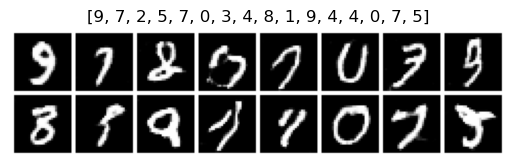

average prediction confidence over 1000 predictions: 0.61028653383255
cumulative prediction counts: [6343, 2991, 3683, 9500, 3602, 3946, 1952, 7796, 6856, 7331]
epoch time: 8.493606805801392, total time: 456.8891489505768
Epoch [55/100] Batch [1/469] Discriminator Loss: 0.7919 Generator Loss: 1.4660
Epoch [55/100] Batch [101/469] Discriminator Loss: 0.8453 Generator Loss: 2.3196
Epoch [55/100] Batch [201/469] Discriminator Loss: 0.8652 Generator Loss: 1.3736
Epoch [55/100] Batch [301/469] Discriminator Loss: 0.8425 Generator Loss: 1.0153
Epoch [55/100] Batch [401/469] Discriminator Loss: 0.7541 Generator Loss: 1.4346


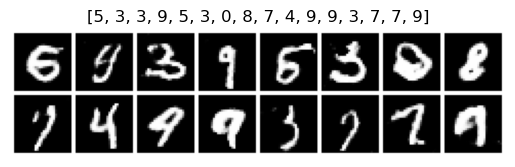

average prediction confidence over 1000 predictions: 0.6127114295959473
cumulative prediction counts: [6486, 3042, 3738, 9660, 3663, 4007, 1972, 7981, 6968, 7483]
epoch time: 8.271152257919312, total time: 465.1603012084961
Epoch [56/100] Batch [1/469] Discriminator Loss: 0.8310 Generator Loss: 2.4348
Epoch [56/100] Batch [101/469] Discriminator Loss: 0.6360 Generator Loss: 2.0782
Epoch [56/100] Batch [201/469] Discriminator Loss: 0.7017 Generator Loss: 1.9762
Epoch [56/100] Batch [301/469] Discriminator Loss: 0.7326 Generator Loss: 1.8064
Epoch [56/100] Batch [401/469] Discriminator Loss: 0.6765 Generator Loss: 1.7331


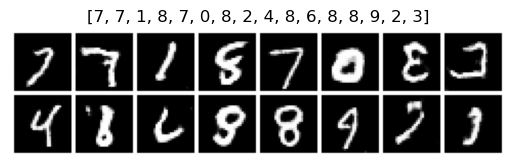

average prediction confidence over 1000 predictions: 0.6107180118560791
cumulative prediction counts: [6639, 3090, 3799, 9807, 3737, 4054, 1992, 8180, 7083, 7619]
epoch time: 8.31339168548584, total time: 473.47369289398193
Epoch [57/100] Batch [1/469] Discriminator Loss: 0.8666 Generator Loss: 1.9090
Epoch [57/100] Batch [101/469] Discriminator Loss: 0.7376 Generator Loss: 1.4969
Epoch [57/100] Batch [201/469] Discriminator Loss: 0.7768 Generator Loss: 2.1149
Epoch [57/100] Batch [301/469] Discriminator Loss: 0.9289 Generator Loss: 2.1411
Epoch [57/100] Batch [401/469] Discriminator Loss: 0.7022 Generator Loss: 2.0785


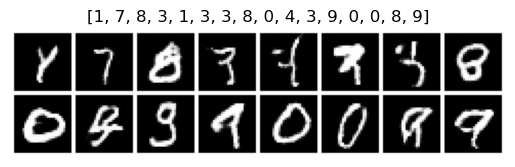

average prediction confidence over 1000 predictions: 0.6084847450256348
cumulative prediction counts: [6760, 3141, 3868, 9949, 3803, 4114, 2017, 8359, 7221, 7768]
epoch time: 8.32226300239563, total time: 481.79595589637756
Epoch [58/100] Batch [1/469] Discriminator Loss: 0.6396 Generator Loss: 1.7447
Epoch [58/100] Batch [101/469] Discriminator Loss: 0.7223 Generator Loss: 1.9294
Epoch [58/100] Batch [201/469] Discriminator Loss: 0.8543 Generator Loss: 1.4540
Epoch [58/100] Batch [301/469] Discriminator Loss: 0.6923 Generator Loss: 2.3424
Epoch [58/100] Batch [401/469] Discriminator Loss: 0.9034 Generator Loss: 1.3129


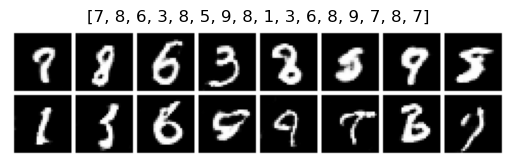

average prediction confidence over 1000 predictions: 0.6149743795394897
cumulative prediction counts: [6887, 3199, 3918, 10093, 3872, 4174, 2039, 8560, 7350, 7908]
epoch time: 8.319280862808228, total time: 490.1152367591858
Epoch [59/100] Batch [1/469] Discriminator Loss: 0.6738 Generator Loss: 1.8063
Epoch [59/100] Batch [101/469] Discriminator Loss: 0.6149 Generator Loss: 2.0649
Epoch [59/100] Batch [201/469] Discriminator Loss: 0.8286 Generator Loss: 1.2578
Epoch [59/100] Batch [301/469] Discriminator Loss: 0.7594 Generator Loss: 1.3362
Epoch [59/100] Batch [401/469] Discriminator Loss: 0.7282 Generator Loss: 1.7781


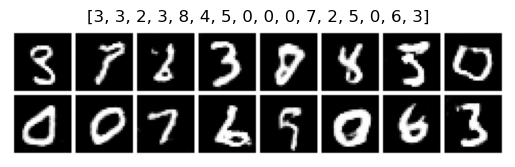

average prediction confidence over 1000 predictions: 0.6029226779937744
cumulative prediction counts: [7020, 3256, 3975, 10242, 3943, 4222, 2064, 8757, 7472, 8049]
epoch time: 8.211672067642212, total time: 498.326908826828
Epoch [60/100] Batch [1/469] Discriminator Loss: 0.7974 Generator Loss: 1.1792
Epoch [60/100] Batch [101/469] Discriminator Loss: 0.6905 Generator Loss: 1.5982
Epoch [60/100] Batch [201/469] Discriminator Loss: 0.6692 Generator Loss: 1.2299
Epoch [60/100] Batch [301/469] Discriminator Loss: 0.7473 Generator Loss: 1.9398
Epoch [60/100] Batch [401/469] Discriminator Loss: 0.7654 Generator Loss: 1.7542


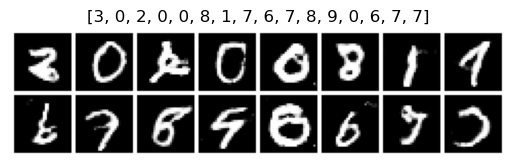

average prediction confidence over 1000 predictions: 0.6021724939346313
cumulative prediction counts: [7147, 3311, 4044, 10377, 4008, 4274, 2082, 8953, 7583, 8221]
epoch time: 8.474434614181519, total time: 506.8013434410095
Epoch [61/100] Batch [1/469] Discriminator Loss: 0.8376 Generator Loss: 2.2949
Epoch [61/100] Batch [101/469] Discriminator Loss: 0.6956 Generator Loss: 2.1864
Epoch [61/100] Batch [201/469] Discriminator Loss: 0.7678 Generator Loss: 1.5029
Epoch [61/100] Batch [301/469] Discriminator Loss: 0.6675 Generator Loss: 2.0447
Epoch [61/100] Batch [401/469] Discriminator Loss: 0.8583 Generator Loss: 1.1047


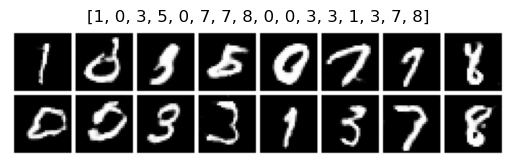

average prediction confidence over 1000 predictions: 0.6011900901794434
cumulative prediction counts: [7295, 3357, 4107, 10541, 4082, 4317, 2107, 9152, 7675, 8367]
epoch time: 8.612501859664917, total time: 515.4138453006744
Epoch [62/100] Batch [1/469] Discriminator Loss: 0.7800 Generator Loss: 1.5468
Epoch [62/100] Batch [101/469] Discriminator Loss: 0.7820 Generator Loss: 1.7127
Epoch [62/100] Batch [201/469] Discriminator Loss: 0.6994 Generator Loss: 1.5448
Epoch [62/100] Batch [301/469] Discriminator Loss: 0.8143 Generator Loss: 1.2392
Epoch [62/100] Batch [401/469] Discriminator Loss: 0.6731 Generator Loss: 1.5474


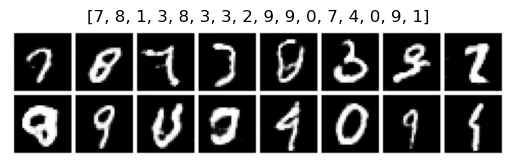

average prediction confidence over 1000 predictions: 0.6103479266166687
cumulative prediction counts: [7426, 3417, 4164, 10676, 4151, 4360, 2131, 9350, 7793, 8532]
epoch time: 8.398542165756226, total time: 523.8123874664307
Epoch [63/100] Batch [1/469] Discriminator Loss: 0.8025 Generator Loss: 1.5880
Epoch [63/100] Batch [101/469] Discriminator Loss: 0.8885 Generator Loss: 1.6364
Epoch [63/100] Batch [201/469] Discriminator Loss: 0.7171 Generator Loss: 1.5374
Epoch [63/100] Batch [301/469] Discriminator Loss: 0.7847 Generator Loss: 2.2169
Epoch [63/100] Batch [401/469] Discriminator Loss: 0.7192 Generator Loss: 1.4027


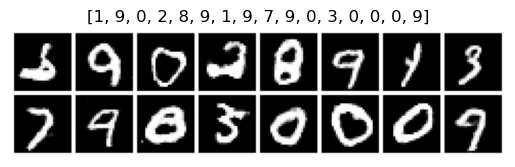

average prediction confidence over 1000 predictions: 0.6057335734367371
cumulative prediction counts: [7550, 3478, 4225, 10827, 4224, 4411, 2149, 9529, 7906, 8701]
epoch time: 8.510421991348267, total time: 532.3228094577789
Epoch [64/100] Batch [1/469] Discriminator Loss: 0.7490 Generator Loss: 1.8044
Epoch [64/100] Batch [101/469] Discriminator Loss: 0.6736 Generator Loss: 2.3213
Epoch [64/100] Batch [201/469] Discriminator Loss: 0.7459 Generator Loss: 1.7608
Epoch [64/100] Batch [301/469] Discriminator Loss: 0.9197 Generator Loss: 1.1585
Epoch [64/100] Batch [401/469] Discriminator Loss: 0.7557 Generator Loss: 1.9996


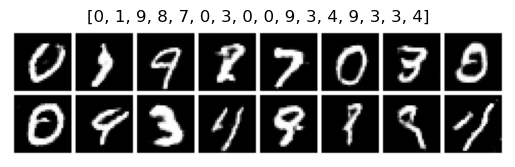

average prediction confidence over 1000 predictions: 0.606472373008728
cumulative prediction counts: [7674, 3528, 4277, 10988, 4292, 4452, 2170, 9733, 8022, 8864]
epoch time: 8.31587290763855, total time: 540.6386823654175
Epoch [65/100] Batch [1/469] Discriminator Loss: 0.7156 Generator Loss: 2.5210
Epoch [65/100] Batch [101/469] Discriminator Loss: 1.0328 Generator Loss: 1.1141
Epoch [65/100] Batch [201/469] Discriminator Loss: 0.8516 Generator Loss: 2.2150
Epoch [65/100] Batch [301/469] Discriminator Loss: 0.6856 Generator Loss: 1.8724
Epoch [65/100] Batch [401/469] Discriminator Loss: 0.7353 Generator Loss: 1.9518


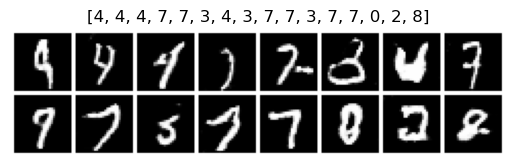

average prediction confidence over 1000 predictions: 0.612730860710144
cumulative prediction counts: [7813, 3586, 4346, 11137, 4359, 4490, 2198, 9925, 8133, 9013]
epoch time: 8.332265853881836, total time: 548.9709482192993
Epoch [66/100] Batch [1/469] Discriminator Loss: 0.7376 Generator Loss: 2.6042
Epoch [66/100] Batch [101/469] Discriminator Loss: 0.7138 Generator Loss: 2.3213
Epoch [66/100] Batch [201/469] Discriminator Loss: 0.8850 Generator Loss: 0.8346
Epoch [66/100] Batch [301/469] Discriminator Loss: 0.6209 Generator Loss: 1.8456
Epoch [66/100] Batch [401/469] Discriminator Loss: 0.7149 Generator Loss: 1.8056


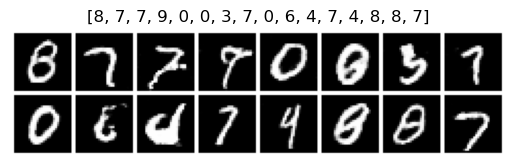

average prediction confidence over 1000 predictions: 0.6175923347473145
cumulative prediction counts: [7958, 3636, 4413, 11281, 4411, 4532, 2226, 10131, 8235, 9177]
epoch time: 8.316338777542114, total time: 557.2872869968414
Epoch [67/100] Batch [1/469] Discriminator Loss: 0.6979 Generator Loss: 2.1085
Epoch [67/100] Batch [101/469] Discriminator Loss: 0.6972 Generator Loss: 1.8661
Epoch [67/100] Batch [201/469] Discriminator Loss: 0.7175 Generator Loss: 1.9178
Epoch [67/100] Batch [301/469] Discriminator Loss: 0.7107 Generator Loss: 1.5020
Epoch [67/100] Batch [401/469] Discriminator Loss: 0.7354 Generator Loss: 1.5976


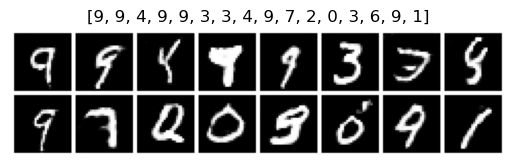

average prediction confidence over 1000 predictions: 0.6065405011177063
cumulative prediction counts: [8101, 3715, 4474, 11432, 4473, 4577, 2252, 10315, 8332, 9329]
epoch time: 8.322774171829224, total time: 565.6100611686707
Epoch [68/100] Batch [1/469] Discriminator Loss: 0.9119 Generator Loss: 2.8589
Epoch [68/100] Batch [101/469] Discriminator Loss: 0.7539 Generator Loss: 2.1180
Epoch [68/100] Batch [201/469] Discriminator Loss: 0.5637 Generator Loss: 1.7029
Epoch [68/100] Batch [301/469] Discriminator Loss: 0.7933 Generator Loss: 1.2281
Epoch [68/100] Batch [401/469] Discriminator Loss: 0.6413 Generator Loss: 2.0169


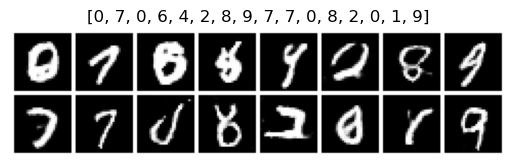

average prediction confidence over 1000 predictions: 0.6111924648284912
cumulative prediction counts: [8215, 3776, 4531, 11563, 4531, 4620, 2278, 10542, 8429, 9515]
epoch time: 8.28103494644165, total time: 573.8910961151123
Epoch [69/100] Batch [1/469] Discriminator Loss: 0.6431 Generator Loss: 1.6189
Epoch [69/100] Batch [101/469] Discriminator Loss: 0.6814 Generator Loss: 1.8933
Epoch [69/100] Batch [201/469] Discriminator Loss: 0.7130 Generator Loss: 1.8417
Epoch [69/100] Batch [301/469] Discriminator Loss: 0.7029 Generator Loss: 2.0114
Epoch [69/100] Batch [401/469] Discriminator Loss: 0.6384 Generator Loss: 1.5302


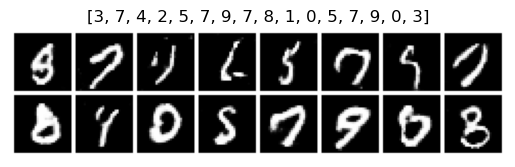

average prediction confidence over 1000 predictions: 0.6119034886360168
cumulative prediction counts: [8346, 3837, 4604, 11700, 4600, 4671, 2293, 10748, 8536, 9665]
epoch time: 8.355847120285034, total time: 582.2469432353973
Epoch [70/100] Batch [1/469] Discriminator Loss: 0.7139 Generator Loss: 1.7083
Epoch [70/100] Batch [101/469] Discriminator Loss: 0.7002 Generator Loss: 1.8955
Epoch [70/100] Batch [201/469] Discriminator Loss: 0.7430 Generator Loss: 1.6746
Epoch [70/100] Batch [301/469] Discriminator Loss: 0.7515 Generator Loss: 2.2853
Epoch [70/100] Batch [401/469] Discriminator Loss: 0.8305 Generator Loss: 1.3080


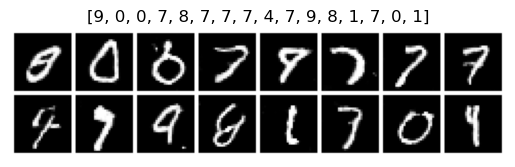

average prediction confidence over 1000 predictions: 0.5939656496047974
cumulative prediction counts: [8480, 3897, 4660, 11839, 4661, 4719, 2316, 10929, 8658, 9841]
epoch time: 8.258301973342896, total time: 590.5052452087402
Epoch [71/100] Batch [1/469] Discriminator Loss: 0.7649 Generator Loss: 1.5239
Epoch [71/100] Batch [101/469] Discriminator Loss: 0.6424 Generator Loss: 1.9793
Epoch [71/100] Batch [201/469] Discriminator Loss: 0.7523 Generator Loss: 1.4694
Epoch [71/100] Batch [301/469] Discriminator Loss: 0.6709 Generator Loss: 1.5846
Epoch [71/100] Batch [401/469] Discriminator Loss: 0.6632 Generator Loss: 1.5587


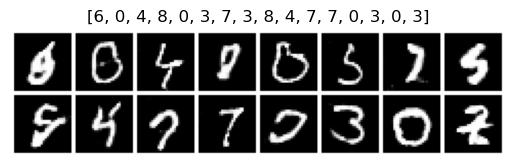

average prediction confidence over 1000 predictions: 0.607008695602417
cumulative prediction counts: [8600, 3954, 4719, 11975, 4727, 4762, 2341, 11160, 8769, 9993]
epoch time: 8.2927827835083, total time: 598.7980279922485
Epoch [72/100] Batch [1/469] Discriminator Loss: 0.7021 Generator Loss: 1.6234
Epoch [72/100] Batch [101/469] Discriminator Loss: 0.7508 Generator Loss: 2.3762
Epoch [72/100] Batch [201/469] Discriminator Loss: 0.6824 Generator Loss: 2.2479
Epoch [72/100] Batch [301/469] Discriminator Loss: 0.7670 Generator Loss: 1.5889
Epoch [72/100] Batch [401/469] Discriminator Loss: 0.6814 Generator Loss: 2.1409


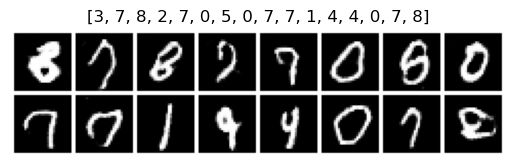

average prediction confidence over 1000 predictions: 0.6120755076408386
cumulative prediction counts: [8736, 4020, 4765, 12116, 4788, 4808, 2359, 11393, 8871, 10144]
epoch time: 8.394783973693848, total time: 607.1928119659424
Epoch [73/100] Batch [1/469] Discriminator Loss: 0.6566 Generator Loss: 2.0729
Epoch [73/100] Batch [101/469] Discriminator Loss: 0.6423 Generator Loss: 1.6690
Epoch [73/100] Batch [201/469] Discriminator Loss: 0.7221 Generator Loss: 2.6159
Epoch [73/100] Batch [301/469] Discriminator Loss: 0.6281 Generator Loss: 1.2766
Epoch [73/100] Batch [401/469] Discriminator Loss: 0.7187 Generator Loss: 2.3142


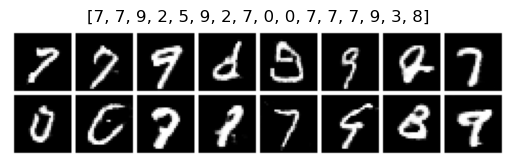

average prediction confidence over 1000 predictions: 0.6082617044448853
cumulative prediction counts: [8866, 4082, 4813, 12268, 4847, 4858, 2383, 11619, 8959, 10305]
epoch time: 8.327736854553223, total time: 615.5205488204956
Epoch [74/100] Batch [1/469] Discriminator Loss: 0.8771 Generator Loss: 1.5189
Epoch [74/100] Batch [101/469] Discriminator Loss: 0.7755 Generator Loss: 2.6373
Epoch [74/100] Batch [201/469] Discriminator Loss: 0.6847 Generator Loss: 2.3907
Epoch [74/100] Batch [301/469] Discriminator Loss: 0.6149 Generator Loss: 2.6258
Epoch [74/100] Batch [401/469] Discriminator Loss: 0.7465 Generator Loss: 1.8841


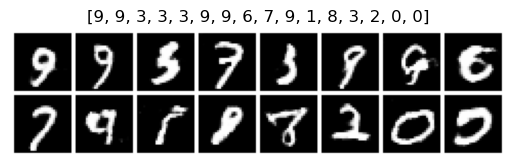

average prediction confidence over 1000 predictions: 0.6272741556167603
cumulative prediction counts: [9008, 4139, 4872, 12415, 4910, 4909, 2403, 11841, 9051, 10452]
epoch time: 8.319471836090088, total time: 623.8400206565857
Epoch [75/100] Batch [1/469] Discriminator Loss: 0.6692 Generator Loss: 1.6821
Epoch [75/100] Batch [101/469] Discriminator Loss: 0.6435 Generator Loss: 2.2039
Epoch [75/100] Batch [201/469] Discriminator Loss: 0.7802 Generator Loss: 2.2980
Epoch [75/100] Batch [301/469] Discriminator Loss: 0.6400 Generator Loss: 2.0521
Epoch [75/100] Batch [401/469] Discriminator Loss: 0.7320 Generator Loss: 2.0539


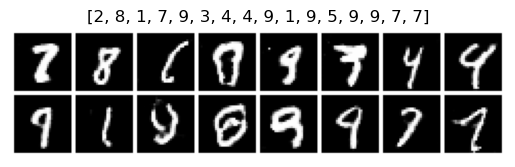

average prediction confidence over 1000 predictions: 0.6156894564628601
cumulative prediction counts: [9134, 4192, 4924, 12552, 4976, 4972, 2418, 12064, 9146, 10622]
epoch time: 8.367063045501709, total time: 632.2070837020874
Epoch [76/100] Batch [1/469] Discriminator Loss: 0.7464 Generator Loss: 1.1946
Epoch [76/100] Batch [101/469] Discriminator Loss: 0.6632 Generator Loss: 1.9104
Epoch [76/100] Batch [201/469] Discriminator Loss: 0.7527 Generator Loss: 2.4382
Epoch [76/100] Batch [301/469] Discriminator Loss: 0.6093 Generator Loss: 2.0403
Epoch [76/100] Batch [401/469] Discriminator Loss: 0.6498 Generator Loss: 1.6564


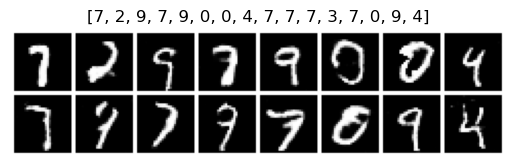

average prediction confidence over 1000 predictions: 0.614456057548523
cumulative prediction counts: [9303, 4247, 4974, 12658, 5033, 5011, 2440, 12291, 9248, 10795]
epoch time: 8.420855045318604, total time: 640.627938747406
Epoch [77/100] Batch [1/469] Discriminator Loss: 0.6879 Generator Loss: 1.4273
Epoch [77/100] Batch [101/469] Discriminator Loss: 0.8394 Generator Loss: 1.1904
Epoch [77/100] Batch [201/469] Discriminator Loss: 0.7375 Generator Loss: 2.4370
Epoch [77/100] Batch [301/469] Discriminator Loss: 0.6960 Generator Loss: 2.0620
Epoch [77/100] Batch [401/469] Discriminator Loss: 0.6391 Generator Loss: 2.6576


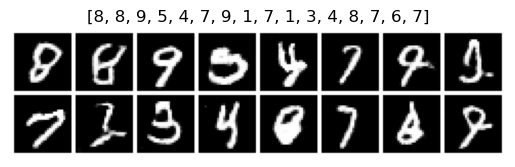

average prediction confidence over 1000 predictions: 0.6076540946960449
cumulative prediction counts: [9432, 4308, 5030, 12786, 5102, 5043, 2460, 12512, 9362, 10965]
epoch time: 8.280797958374023, total time: 648.90873670578
Epoch [78/100] Batch [1/469] Discriminator Loss: 0.6524 Generator Loss: 1.4843
Epoch [78/100] Batch [101/469] Discriminator Loss: 0.6707 Generator Loss: 1.8582
Epoch [78/100] Batch [201/469] Discriminator Loss: 0.7568 Generator Loss: 1.7753
Epoch [78/100] Batch [301/469] Discriminator Loss: 0.6707 Generator Loss: 1.9891
Epoch [78/100] Batch [401/469] Discriminator Loss: 0.7234 Generator Loss: 2.0515


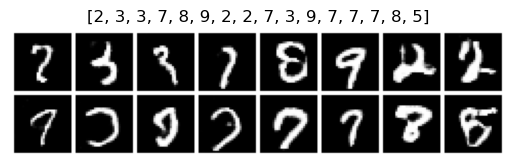

average prediction confidence over 1000 predictions: 0.6228471398353577
cumulative prediction counts: [9574, 4368, 5089, 12916, 5160, 5078, 2479, 12732, 9481, 11123]
epoch time: 8.294481992721558, total time: 657.2032186985016
Epoch [79/100] Batch [1/469] Discriminator Loss: 0.7747 Generator Loss: 1.6515
Epoch [79/100] Batch [101/469] Discriminator Loss: 0.7673 Generator Loss: 1.9586
Epoch [79/100] Batch [201/469] Discriminator Loss: 0.6722 Generator Loss: 2.2468
Epoch [79/100] Batch [301/469] Discriminator Loss: 0.6445 Generator Loss: 2.2473
Epoch [79/100] Batch [401/469] Discriminator Loss: 0.7695 Generator Loss: 1.6166


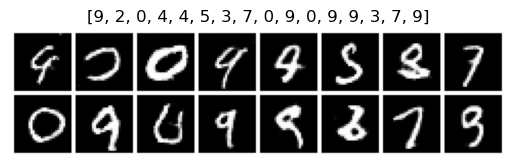

average prediction confidence over 1000 predictions: 0.6174579858779907
cumulative prediction counts: [9711, 4409, 5154, 13053, 5219, 5118, 2500, 12966, 9571, 11299]
epoch time: 8.356295108795166, total time: 665.5595138072968
Epoch [80/100] Batch [1/469] Discriminator Loss: 0.8738 Generator Loss: 2.6002
Epoch [80/100] Batch [101/469] Discriminator Loss: 0.7130 Generator Loss: 1.8674
Epoch [80/100] Batch [201/469] Discriminator Loss: 0.7637 Generator Loss: 1.5352
Epoch [80/100] Batch [301/469] Discriminator Loss: 0.6958 Generator Loss: 2.3802
Epoch [80/100] Batch [401/469] Discriminator Loss: 0.6464 Generator Loss: 1.3908


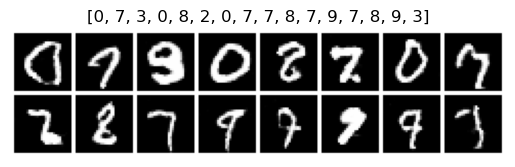

average prediction confidence over 1000 predictions: 0.6258091926574707
cumulative prediction counts: [9826, 4468, 5196, 13179, 5287, 5156, 2518, 13203, 9663, 11504]
epoch time: 8.329180002212524, total time: 673.8886938095093
Epoch [81/100] Batch [1/469] Discriminator Loss: 0.8920 Generator Loss: 2.7102
Epoch [81/100] Batch [101/469] Discriminator Loss: 0.7478 Generator Loss: 2.6372
Epoch [81/100] Batch [201/469] Discriminator Loss: 0.6783 Generator Loss: 1.9624
Epoch [81/100] Batch [301/469] Discriminator Loss: 0.7588 Generator Loss: 1.4778
Epoch [81/100] Batch [401/469] Discriminator Loss: 0.6166 Generator Loss: 2.6147


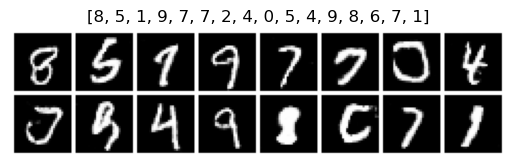

average prediction confidence over 1000 predictions: 0.6227267384529114
cumulative prediction counts: [9962, 4529, 5255, 13298, 5350, 5195, 2545, 13456, 9758, 11652]
epoch time: 8.314812898635864, total time: 682.2035067081451
Epoch [82/100] Batch [1/469] Discriminator Loss: 0.6563 Generator Loss: 1.7603
Epoch [82/100] Batch [101/469] Discriminator Loss: 0.6662 Generator Loss: 1.5690
Epoch [82/100] Batch [201/469] Discriminator Loss: 0.7136 Generator Loss: 1.5086
Epoch [82/100] Batch [301/469] Discriminator Loss: 0.6477 Generator Loss: 2.5332
Epoch [82/100] Batch [401/469] Discriminator Loss: 0.8426 Generator Loss: 3.0308


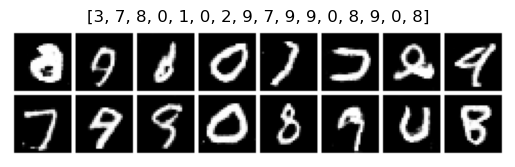

average prediction confidence over 1000 predictions: 0.6141405701637268
cumulative prediction counts: [10099, 4574, 5320, 13429, 5411, 5237, 2566, 13701, 9851, 11812]
epoch time: 8.299311876296997, total time: 690.5028185844421
Epoch [83/100] Batch [1/469] Discriminator Loss: 0.5953 Generator Loss: 1.5275
Epoch [83/100] Batch [101/469] Discriminator Loss: 0.6094 Generator Loss: 2.6200
Epoch [83/100] Batch [201/469] Discriminator Loss: 0.7833 Generator Loss: 2.8423
Epoch [83/100] Batch [301/469] Discriminator Loss: 0.8250 Generator Loss: 1.2779
Epoch [83/100] Batch [401/469] Discriminator Loss: 0.7079 Generator Loss: 2.4282


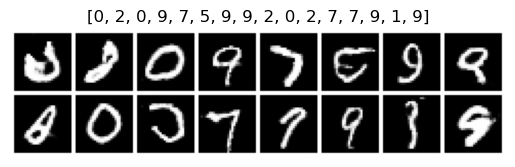

average prediction confidence over 1000 predictions: 0.6202225685119629
cumulative prediction counts: [10247, 4642, 5386, 13557, 5462, 5264, 2589, 13929, 9940, 11984]
epoch time: 8.373658895492554, total time: 698.8764774799347
Epoch [84/100] Batch [1/469] Discriminator Loss: 0.7595 Generator Loss: 2.1795
Epoch [84/100] Batch [101/469] Discriminator Loss: 0.7419 Generator Loss: 1.9387
Epoch [84/100] Batch [201/469] Discriminator Loss: 0.7125 Generator Loss: 1.5241
Epoch [84/100] Batch [301/469] Discriminator Loss: 0.7287 Generator Loss: 1.8117
Epoch [84/100] Batch [401/469] Discriminator Loss: 0.8371 Generator Loss: 2.6976


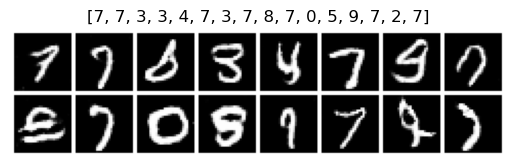

average prediction confidence over 1000 predictions: 0.6268588900566101
cumulative prediction counts: [10379, 4699, 5437, 13681, 5531, 5302, 2611, 14182, 10031, 12147]
epoch time: 8.346474885940552, total time: 707.2229523658752
Epoch [85/100] Batch [1/469] Discriminator Loss: 0.8589 Generator Loss: 1.0659
Epoch [85/100] Batch [101/469] Discriminator Loss: 0.8166 Generator Loss: 2.1233
Epoch [85/100] Batch [201/469] Discriminator Loss: 0.7120 Generator Loss: 1.7575
Epoch [85/100] Batch [301/469] Discriminator Loss: 0.6533 Generator Loss: 1.7122
Epoch [85/100] Batch [401/469] Discriminator Loss: 0.5631 Generator Loss: 2.3664


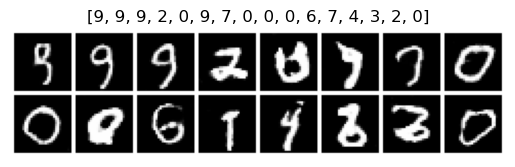

average prediction confidence over 1000 predictions: 0.618620753288269
cumulative prediction counts: [10522, 4756, 5490, 13801, 5603, 5342, 2621, 14431, 10121, 12313]
epoch time: 8.362751007080078, total time: 715.5857033729553
Epoch [86/100] Batch [1/469] Discriminator Loss: 0.6687 Generator Loss: 1.8557
Epoch [86/100] Batch [101/469] Discriminator Loss: 0.7696 Generator Loss: 2.9093
Epoch [86/100] Batch [201/469] Discriminator Loss: 0.8215 Generator Loss: 2.4247
Epoch [86/100] Batch [301/469] Discriminator Loss: 0.6381 Generator Loss: 1.5106
Epoch [86/100] Batch [401/469] Discriminator Loss: 0.6558 Generator Loss: 1.7862


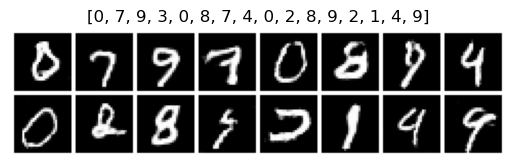

average prediction confidence over 1000 predictions: 0.6166738867759705
cumulative prediction counts: [10668, 4819, 5537, 13927, 5674, 5379, 2638, 14662, 10208, 12488]
epoch time: 8.480058670043945, total time: 724.0657620429993
Epoch [87/100] Batch [1/469] Discriminator Loss: 0.6521 Generator Loss: 2.1258
Epoch [87/100] Batch [101/469] Discriminator Loss: 0.6369 Generator Loss: 1.8191
Epoch [87/100] Batch [201/469] Discriminator Loss: 0.8428 Generator Loss: 1.4671
Epoch [87/100] Batch [301/469] Discriminator Loss: 0.6940 Generator Loss: 1.7147
Epoch [87/100] Batch [401/469] Discriminator Loss: 0.7327 Generator Loss: 2.0663


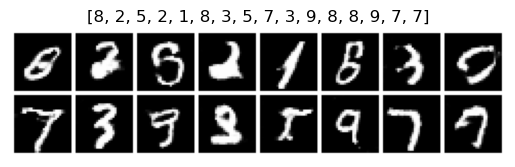

average prediction confidence over 1000 predictions: 0.6150381565093994
cumulative prediction counts: [10797, 4899, 5583, 14072, 5721, 5420, 2658, 14903, 10300, 12647]
epoch time: 8.291971683502197, total time: 732.3577337265015
Epoch [88/100] Batch [1/469] Discriminator Loss: 0.5983 Generator Loss: 2.2314
Epoch [88/100] Batch [101/469] Discriminator Loss: 0.6288 Generator Loss: 2.0199
Epoch [88/100] Batch [201/469] Discriminator Loss: 0.8508 Generator Loss: 1.9714
Epoch [88/100] Batch [301/469] Discriminator Loss: 0.7936 Generator Loss: 2.5501
Epoch [88/100] Batch [401/469] Discriminator Loss: 0.5745 Generator Loss: 1.9329


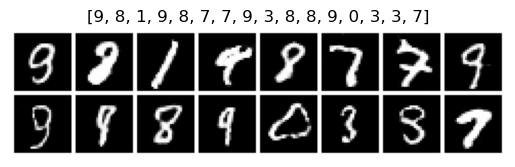

average prediction confidence over 1000 predictions: 0.6176936626434326
cumulative prediction counts: [10910, 4972, 5643, 14184, 5783, 5464, 2685, 15140, 10403, 12816]
epoch time: 8.393009901046753, total time: 740.7507436275482
Epoch [89/100] Batch [1/469] Discriminator Loss: 0.7202 Generator Loss: 1.5239
Epoch [89/100] Batch [101/469] Discriminator Loss: 0.6801 Generator Loss: 2.1933
Epoch [89/100] Batch [201/469] Discriminator Loss: 0.6275 Generator Loss: 2.2353
Epoch [89/100] Batch [301/469] Discriminator Loss: 0.6806 Generator Loss: 2.0929
Epoch [89/100] Batch [401/469] Discriminator Loss: 0.6527 Generator Loss: 1.7413


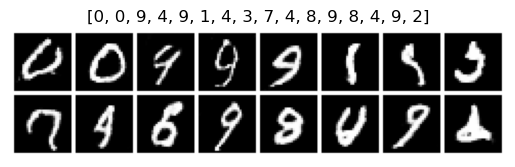

average prediction confidence over 1000 predictions: 0.6238821148872375
cumulative prediction counts: [11062, 5031, 5695, 14302, 5879, 5504, 2702, 15370, 10484, 12971]
epoch time: 8.411253929138184, total time: 749.1619975566864
Epoch [90/100] Batch [1/469] Discriminator Loss: 0.6085 Generator Loss: 1.5376
Epoch [90/100] Batch [101/469] Discriminator Loss: 0.7854 Generator Loss: 2.7494
Epoch [90/100] Batch [201/469] Discriminator Loss: 0.6799 Generator Loss: 2.3448
Epoch [90/100] Batch [301/469] Discriminator Loss: 0.6640 Generator Loss: 1.4455
Epoch [90/100] Batch [401/469] Discriminator Loss: 0.7231 Generator Loss: 2.0050


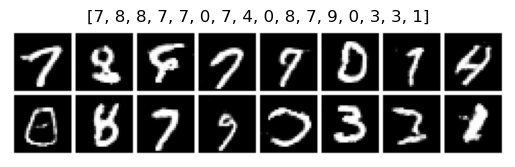

average prediction confidence over 1000 predictions: 0.6205579042434692
cumulative prediction counts: [11191, 5104, 5753, 14431, 5930, 5543, 2719, 15602, 10592, 13135]
epoch time: 8.314620971679688, total time: 757.4766185283661
Epoch [91/100] Batch [1/469] Discriminator Loss: 0.5653 Generator Loss: 2.2749
Epoch [91/100] Batch [101/469] Discriminator Loss: 0.9353 Generator Loss: 3.0532
Epoch [91/100] Batch [201/469] Discriminator Loss: 0.6911 Generator Loss: 2.0512
Epoch [91/100] Batch [301/469] Discriminator Loss: 0.6267 Generator Loss: 1.7209
Epoch [91/100] Batch [401/469] Discriminator Loss: 0.8528 Generator Loss: 3.0644


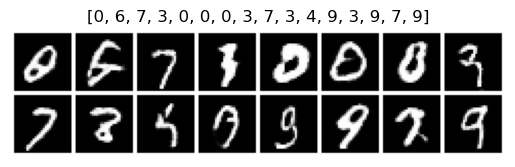

average prediction confidence over 1000 predictions: 0.6191577315330505
cumulative prediction counts: [11323, 5148, 5803, 14551, 6004, 5585, 2742, 15820, 10711, 13313]
epoch time: 8.279875993728638, total time: 765.7564945220947
Epoch [92/100] Batch [1/469] Discriminator Loss: 0.6630 Generator Loss: 2.1196
Epoch [92/100] Batch [101/469] Discriminator Loss: 0.8191 Generator Loss: 2.6216
Epoch [92/100] Batch [201/469] Discriminator Loss: 0.6930 Generator Loss: 2.6609
Epoch [92/100] Batch [301/469] Discriminator Loss: 1.0474 Generator Loss: 1.4503
Epoch [92/100] Batch [401/469] Discriminator Loss: 0.5858 Generator Loss: 2.1819


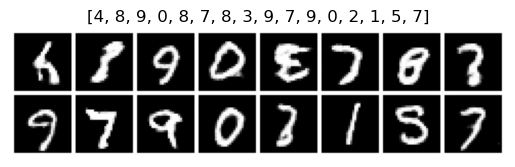

average prediction confidence over 1000 predictions: 0.6298289895057678
cumulative prediction counts: [11466, 5203, 5866, 14666, 6073, 5617, 2756, 16069, 10810, 13474]
epoch time: 8.272922039031982, total time: 774.0294165611267
Epoch [93/100] Batch [1/469] Discriminator Loss: 0.6902 Generator Loss: 2.1902
Epoch [93/100] Batch [101/469] Discriminator Loss: 0.8819 Generator Loss: 2.8086
Epoch [93/100] Batch [201/469] Discriminator Loss: 0.6696 Generator Loss: 1.4720
Epoch [93/100] Batch [301/469] Discriminator Loss: 0.6169 Generator Loss: 1.9700
Epoch [93/100] Batch [401/469] Discriminator Loss: 0.6941 Generator Loss: 1.8282


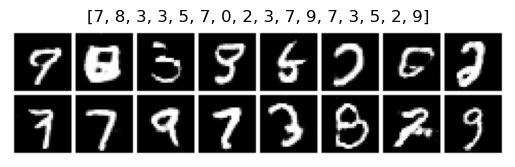

average prediction confidence over 1000 predictions: 0.6275665760040283
cumulative prediction counts: [11615, 5262, 5919, 14779, 6141, 5655, 2777, 16339, 10896, 13617]
epoch time: 8.399485111236572, total time: 782.4289016723633
Epoch [94/100] Batch [1/469] Discriminator Loss: 0.6665 Generator Loss: 1.6358
Epoch [94/100] Batch [101/469] Discriminator Loss: 0.6445 Generator Loss: 1.6452
Epoch [94/100] Batch [201/469] Discriminator Loss: 0.6020 Generator Loss: 1.7731
Epoch [94/100] Batch [301/469] Discriminator Loss: 0.6442 Generator Loss: 1.9678
Epoch [94/100] Batch [401/469] Discriminator Loss: 0.7941 Generator Loss: 2.7371


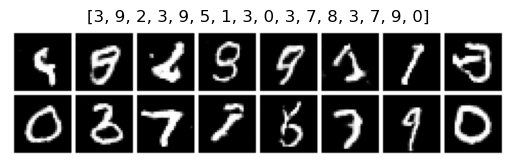

average prediction confidence over 1000 predictions: 0.6141064763069153
cumulative prediction counts: [11750, 5313, 5970, 14901, 6215, 5682, 2785, 16598, 10990, 13796]
epoch time: 8.543561935424805, total time: 790.9724636077881
Epoch [95/100] Batch [1/469] Discriminator Loss: 0.6606 Generator Loss: 1.6529
Epoch [95/100] Batch [101/469] Discriminator Loss: 0.6290 Generator Loss: 1.9137
Epoch [95/100] Batch [201/469] Discriminator Loss: 0.6566 Generator Loss: 2.0631
Epoch [95/100] Batch [301/469] Discriminator Loss: 0.6674 Generator Loss: 1.5746
Epoch [95/100] Batch [401/469] Discriminator Loss: 0.6913 Generator Loss: 2.0235


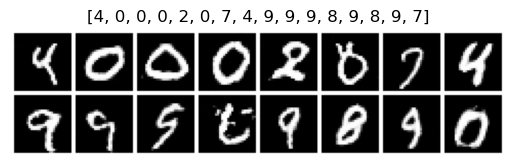

average prediction confidence over 1000 predictions: 0.6179190874099731
cumulative prediction counts: [11886, 5380, 6010, 15005, 6281, 5705, 2799, 16863, 11091, 13980]
epoch time: 8.47098422050476, total time: 799.4434478282928
Epoch [96/100] Batch [1/469] Discriminator Loss: 0.5985 Generator Loss: 1.7568
Epoch [96/100] Batch [101/469] Discriminator Loss: 0.6021 Generator Loss: 2.1677
Epoch [96/100] Batch [201/469] Discriminator Loss: 0.6024 Generator Loss: 2.2401
Epoch [96/100] Batch [301/469] Discriminator Loss: 0.6755 Generator Loss: 1.6453
Epoch [96/100] Batch [401/469] Discriminator Loss: 0.6783 Generator Loss: 1.5263


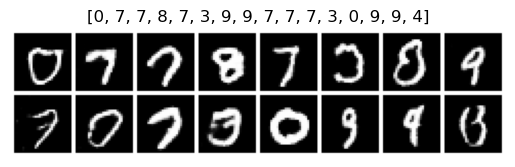

average prediction confidence over 1000 predictions: 0.6267772912979126
cumulative prediction counts: [12042, 5441, 6059, 15120, 6352, 5733, 2807, 17145, 11180, 14121]
epoch time: 8.305114984512329, total time: 807.7485628128052
Epoch [97/100] Batch [1/469] Discriminator Loss: 0.6780 Generator Loss: 1.7658
Epoch [97/100] Batch [101/469] Discriminator Loss: 0.7456 Generator Loss: 1.5739
Epoch [97/100] Batch [201/469] Discriminator Loss: 1.0222 Generator Loss: 3.5606
Epoch [97/100] Batch [301/469] Discriminator Loss: 0.6835 Generator Loss: 1.9117
Epoch [97/100] Batch [401/469] Discriminator Loss: 0.8748 Generator Loss: 1.4441


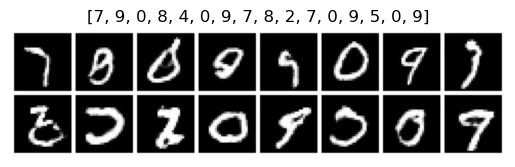

average prediction confidence over 1000 predictions: 0.6231714487075806
cumulative prediction counts: [12168, 5507, 6116, 15225, 6415, 5760, 2826, 17421, 11278, 14284]
epoch time: 8.399074077606201, total time: 816.1476368904114
Epoch [98/100] Batch [1/469] Discriminator Loss: 0.6743 Generator Loss: 2.0904
Epoch [98/100] Batch [101/469] Discriminator Loss: 0.7894 Generator Loss: 2.5202
Epoch [98/100] Batch [201/469] Discriminator Loss: 0.6034 Generator Loss: 2.0152
Epoch [98/100] Batch [301/469] Discriminator Loss: 0.6270 Generator Loss: 1.9922
Epoch [98/100] Batch [401/469] Discriminator Loss: 0.7800 Generator Loss: 1.3077


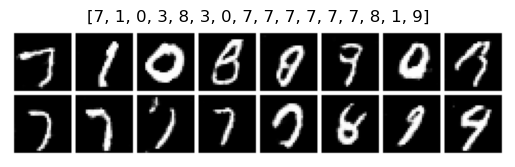

average prediction confidence over 1000 predictions: 0.6196002960205078
cumulative prediction counts: [12325, 5567, 6168, 15325, 6480, 5792, 2844, 17678, 11357, 14464]
epoch time: 8.341482877731323, total time: 824.4891197681427
Epoch [99/100] Batch [1/469] Discriminator Loss: 0.7826 Generator Loss: 3.1655
Epoch [99/100] Batch [101/469] Discriminator Loss: 0.7446 Generator Loss: 2.1969
Epoch [99/100] Batch [201/469] Discriminator Loss: 0.6581 Generator Loss: 1.7595
Epoch [99/100] Batch [301/469] Discriminator Loss: 0.6234 Generator Loss: 2.4876
Epoch [99/100] Batch [401/469] Discriminator Loss: 0.6254 Generator Loss: 1.6808


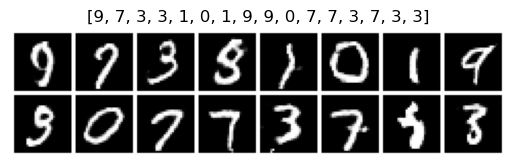

average prediction confidence over 1000 predictions: 0.6319109201431274
cumulative prediction counts: [12491, 5628, 6213, 15438, 6547, 5818, 2864, 17939, 11440, 14622]
epoch time: 8.318841218948364, total time: 832.8079609870911
Epoch [100/100] Batch [1/469] Discriminator Loss: 0.7717 Generator Loss: 1.4588
Epoch [100/100] Batch [101/469] Discriminator Loss: 0.6330 Generator Loss: 1.8544
Epoch [100/100] Batch [201/469] Discriminator Loss: 0.6150 Generator Loss: 2.9260
Epoch [100/100] Batch [301/469] Discriminator Loss: 0.7229 Generator Loss: 1.4580
Epoch [100/100] Batch [401/469] Discriminator Loss: 0.7179 Generator Loss: 1.6474


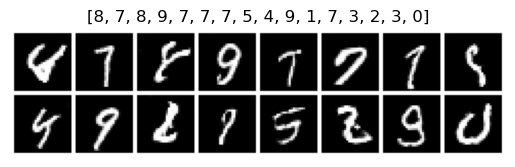

average prediction confidence over 1000 predictions: 0.6272776126861572
cumulative prediction counts: [12617, 5710, 6266, 15533, 6598, 5843, 2879, 18216, 11535, 14803]
epoch time: 8.635838985443115, total time: 841.4437999725342


In [ ]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
#torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

# Define the loss function and optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Load the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Define the number of epochs and the device to use
num_epochs = 100
device = torch.device('mps')

# Move the generator and discriminator networks to the device
generator.to(device)
discriminator.to(device)

# average of all confidences of predictions per epoch
confidences = []
counts = [0]*10
# Train the generator and discriminator networks
time_total = 0
for epoch in range(num_epochs):
    time_epoch = 0
    start = time.time()
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.shape[0]
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train the discriminator network
        discriminator_optimizer.zero_grad()
        real_images = real_images.to(device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator network
        generator_optimizer.zero_grad()
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        generator_loss = criterion(fake_outputs, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        # Print the loss statistics
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                  f'Discriminator Loss: {discriminator_loss.item():.4f} '
                  f'Generator Loss: {generator_loss.item():.4f}')

    # Generate 100 samples and count how many of each digit 
    with torch.no_grad():
        # Define the fixed noise vector for generating samples
        sample_noise = torch.randn(1000, 100, device=device)
        generated_images = generator(sample_noise)
        generated_images = 0.5 * (generated_images + 1)
        output = model(generated_images)
        pred = output.argmax(dim=1, keepdim=True)
        grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title([int(pred[x]) for x in range(16)])
        plt.show()
        #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
        avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
        confidences.append(avg_conf)
        for p in pred:
            counts[p] += 1

    time_epoch = time.time() - start
    time_total += time_epoch
    print(f"average prediction confidence over 1000 predictions: {avg_conf}")
    print(f"cumulative prediction counts: {counts}")
    print(f"epoch time: {time_epoch}, total time: {time_total}")
        



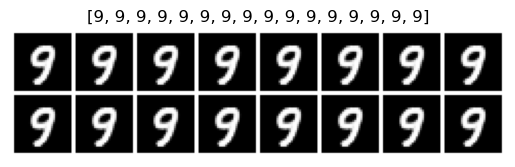

In [ ]:
sample_noise = torch.zeros(1000, 100, device=device)
generated_images = generator(sample_noise)
generated_images = 0.5 * (generated_images + 1)
output = model(generated_images)
pred = output.argmax(dim=1, keepdim=True)
grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.title([int(pred[x]) for x in range(16)])
plt.show()
#print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
avg_conf = torch.mean(torch.exp(output).max(dim=1).values)

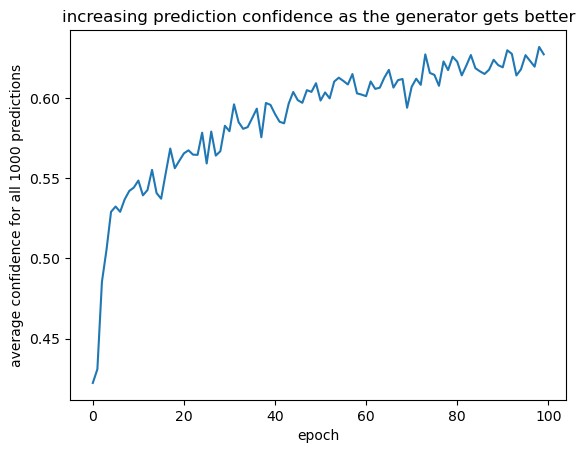

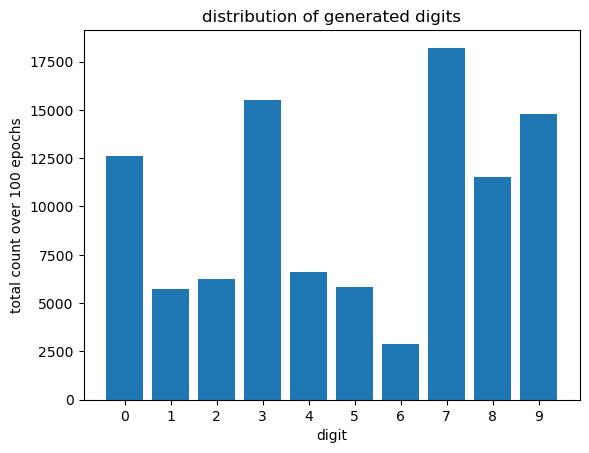

In [ ]:
# now let's plot the average confidences in the predictions over the epochs
import matplotlib.pyplot as plt
plt.plot([float(c) for c in confidences])
plt.xlabel("epoch")
plt.ylabel("average confidence for all 1000 predictions")
plt.title("increasing prediction confidence as the generator gets better")
plt.show()

plt.bar([f"{x}" for x in range(10)], counts)
plt.xlabel("digit")
plt.ylabel("total count over 100 epochs")
plt.title("distribution of generated digits")
plt.show()